***PART - A***

A communications equipment manufacturing company has a product that is responsible for emitting informative signals. The company wants to build a machine learning model that can help the company predict the equipment’s signal quality using various parameters.

**PART-B**

Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions of geo-located 360-degree panoramic images.

# **PART- A**

---

: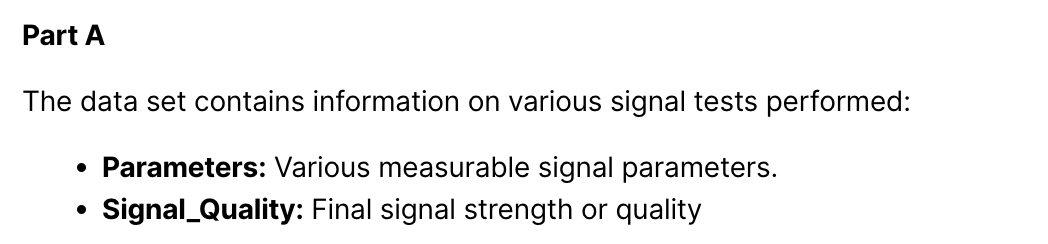

In [133]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer

In [134]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [135]:
!pip install tensorflow pandas numpy

In [136]:
# from google.colab import files
# uploaded = files.upload()

# **Q1 A** - Read the ‘Signals.csv’ as DatFrame and import required libraries.

In [137]:
df1 = pd.read_csv("/content/drive/My Drive/AIML/NN Project Data - Signal.csv")
df1.head()


,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [138]:
df1.shape

(1599, 12)

# **Q1 B** - Check for missing values and print percentage for each attribute.

In [139]:
df1.isnull().sum()

,0
Parameter 1,0
Parameter 2,0
Parameter 3,0
Parameter 4,0
Parameter 5,0
Parameter 6,0
Parameter 7,0
Parameter 8,0
Parameter 9,0
Parameter 10,0


In [140]:
#Defining function to calculate missing values

def missing_values_percentage(df):

  for column in df.columns[:-1]:
    mis_val = df[column].isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)
    print(f'{column} - {mis_val_percent:.2f}%')


# calling the function to calculate percentage of missing values in column
missing_values_percentage(df1)

Parameter 1 - 0.00%
Parameter 2 - 0.00%
Parameter 3 - 0.00%
Parameter 4 - 0.00%
Parameter 5 - 0.00%
Parameter 6 - 0.00%
Parameter 7 - 0.00%
Parameter 8 - 0.00%
Parameter 9 - 0.00%
Parameter 10 - 0.00%
Parameter 11 - 0.00%


# **Insight**

---



1. No Null Values are observed in dataset.




# **Q1 C** - Check for presence of duplicate records in the dataset and impute with appropriate method.


In [141]:
df1.duplicated().sum()

240

In [142]:
df1_cleaned = df1.drop_duplicates(keep='last')
df1_cleaned.duplicated().sum()

0

In [143]:
print('Data dimentions before data cleaning',df1.shape)
print('Data dimentions after data cleaning',df1_cleaned.shape)

Data dimentions before data cleaning (1599, 12)
Data dimentions after data cleaning (1359, 12)


# **Q1 D** - Visualise distribution of the target variable.

Data Distrubution % of Target Variable : 
 Signal_Strength
5    42.46
6    39.37
7    12.29
4     3.90
8     1.25
3     0.74
Name: count, dtype: float64


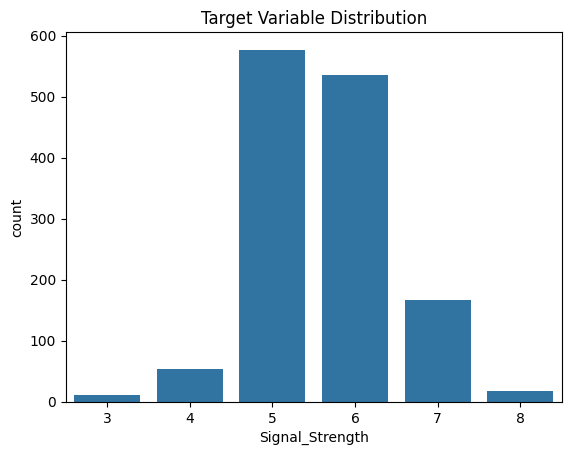

In [144]:
cat_percentage=round(df1_cleaned['Signal_Strength'].value_counts()/len(df1_cleaned)*100,2).sort_values(ascending=False)

print('Data Distrubution % of Target Variable : \n',cat_percentage)




sns.countplot(x=df1_cleaned['Signal_Strength'])
plt.title("Target Variable Distribution")
plt.show()



# **Q1 E** - Share insights from the initial data analysis (at least 2).

**Insights**

---

**Class Distribution:**

Classes 5 and 6 collectively account for approximately 81.83% of the dataset, with class 5 at 42.46% and class 6 at 39.37%. This significant concentration indicates that these classes represent the most common outcomes in the dataset.
Classes 7, 4, 8, and 3 make up a smaller portion of the data, with class 7 at 12.29%, class 4 at 3.90%, class 8 at 1.25%, and class 3 at 0.74%. The low representation of these classes suggests they may contain rare or edge-case scenarios.

**Data Duplication:**

It is important to note that there are 240 duplicate records identified and removed from the dataset. The elimination of these duplicates is crucial for maintaining data integrity and ensuring accurate model training and evaluation.

**Implications for Modeling:**

The significant class imbalance, with a heavy skew towards classes 5 and 6, poses a risk of biased predictions in machine learning models. Models may overly favor these classes at the expense of minority classes, which could result in poor performance for less represented outcomes.
It is recommended to employ strategies to address this imbalance, such as resampling techniques (over-sampling minority classes or under-sampling majority classes) or using cost-sensitive learning methods to ensure that the model adequately learns from all classes.

# **Q2 A** - Split the data into X & Y.

In [145]:
X1= df1_cleaned.iloc[:,:-1]
Y1= df1_cleaned.iloc[:,-1]

In [146]:
X1.shape

(1359, 11)

In [147]:
Y1.shape

(1359,)

# **Q2 B** - Split the data into train & test with 70:30 proportion.

In [148]:
from sklearn.model_selection import train_test_split


x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)

# **Q2 C** - Print shape of all the 4 variables and verify if train and test data is in sync.

In [149]:
print('shape of x1_train :',x1_train.shape)
print('shape of x1_test :',x1_test.shape)
print('shape of y1_train :',y1_train.shape)
print('shape of y1_test',y1_test.shape)

shape of x1_train : (951, 11)
shape of x1_test : (408, 11)
shape of y1_train : (951,)
shape of y1_test (408,)


In [150]:
def data_sync_check(f1,f2,d):
  if f1.shape[d] == f2.shape[d]:
    print(f"Data is in sync!")
  else:
    print(f"Warning: {f1} and {f2} data are not in sync!")

In [151]:
data_sync_check(x1_train,x1_test,1)
data_sync_check(x1_train,y1_train,0)
data_sync_check(x1_test,y1_test,0)

Data is in sync!
Data is in sync!
Data is in sync!



**Insight**
---

1.Test and Training data is in sync.

# **Q2 D** - Normalise the train and test data with appropriate method.

In [152]:
def plot_boxplot_and_hist(df, col_name, figsize=(10, 5)):
    fig, (ax_box, ax_hist) = plt.subplots(1,2, sharex=True, figsize=figsize)

    # Boxplot
    sns.boxplot(df[col_name], ax=ax_box, orient='h')
    ax_box.set_title(f'Boxplot of column {col_name}')
    ax_box.set_xlabel('')

    # Histogram
    sns.histplot(df[col_name], kde=True, bins=20, edgecolor='black', ax=ax_hist)
    ax_hist.set_title(f'Histogram of column {col_name}')
    ax_hist.set_xlabel('Value')

    plt.show()

 **Data Distribution of Training Dataset**

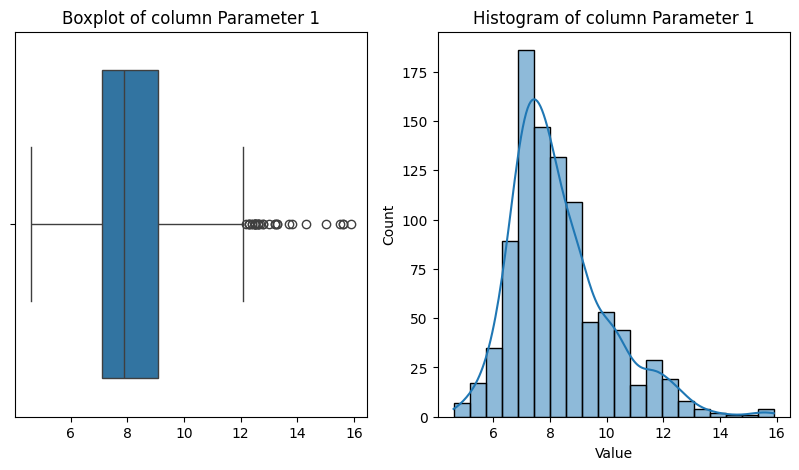

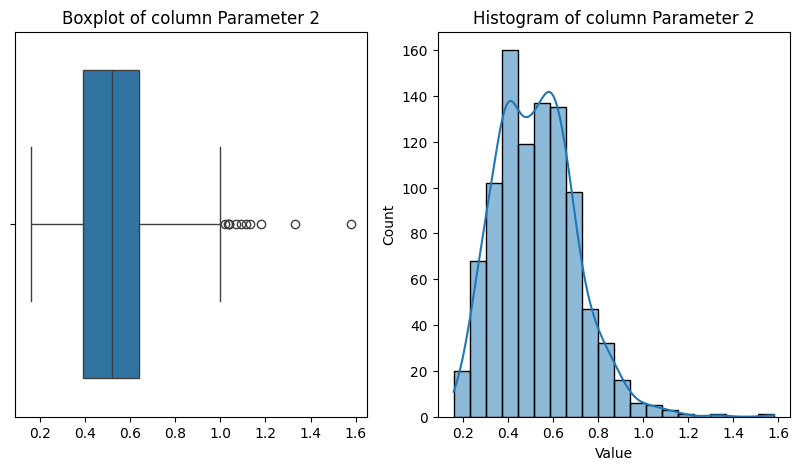

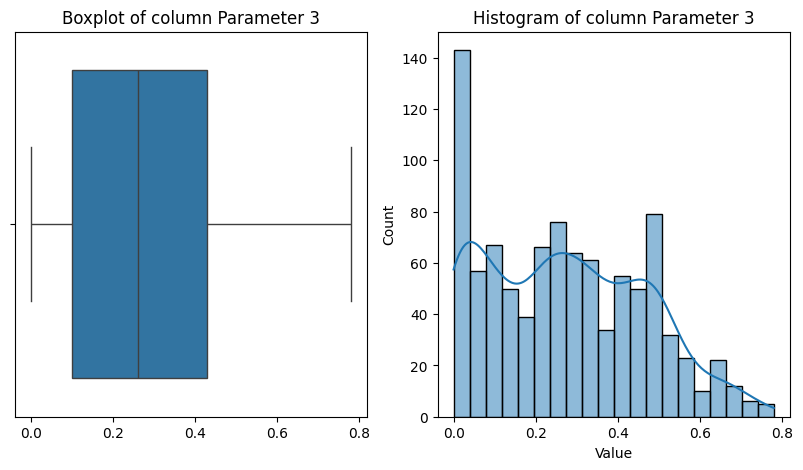

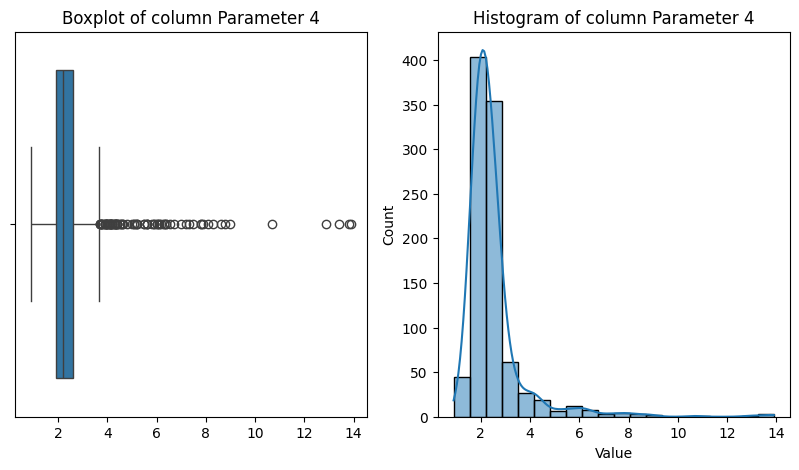

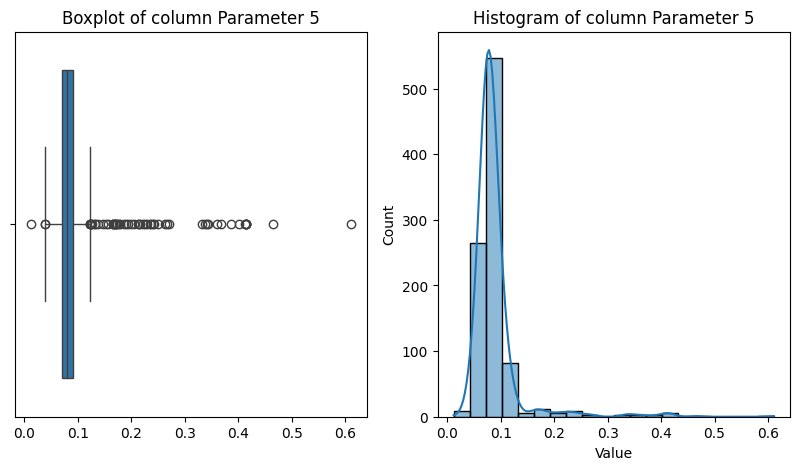

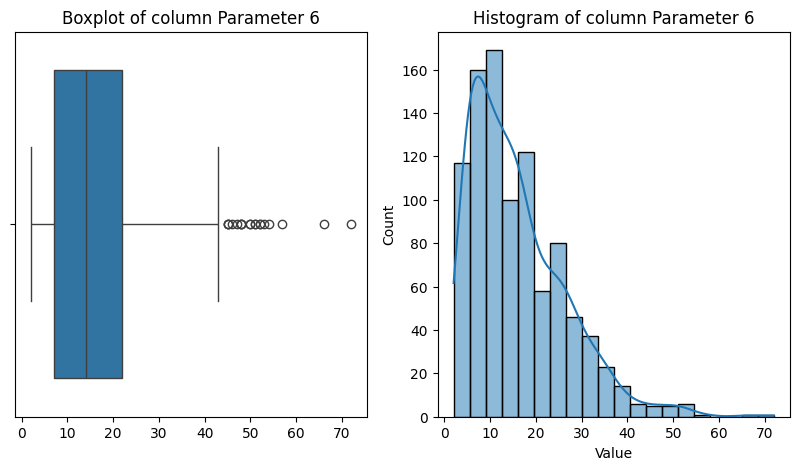

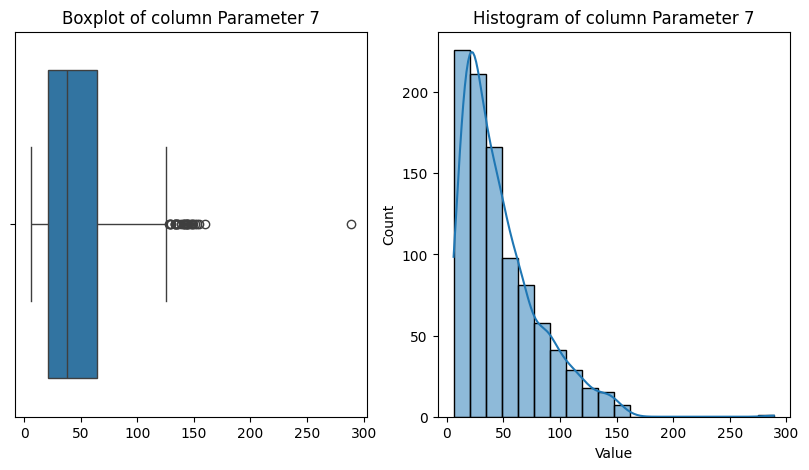

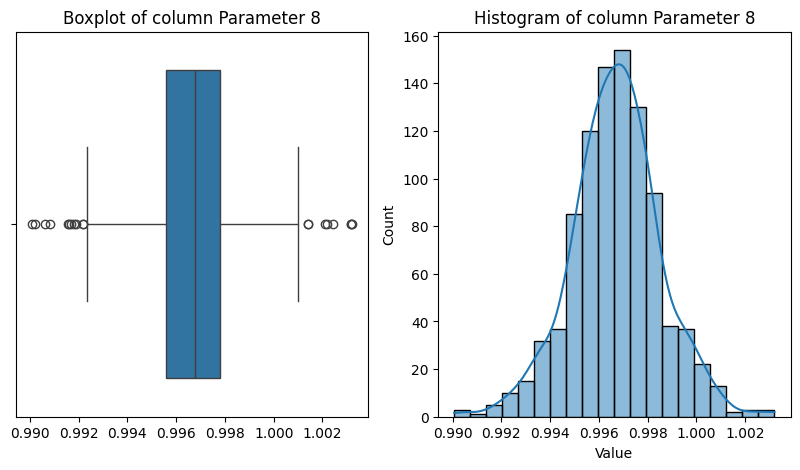

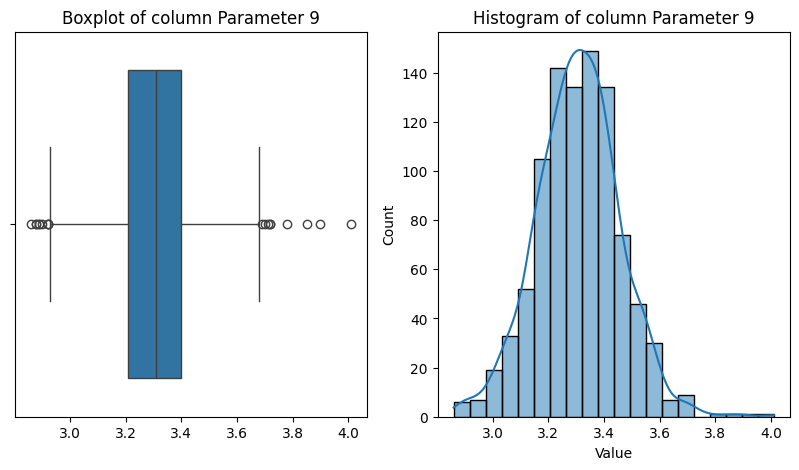

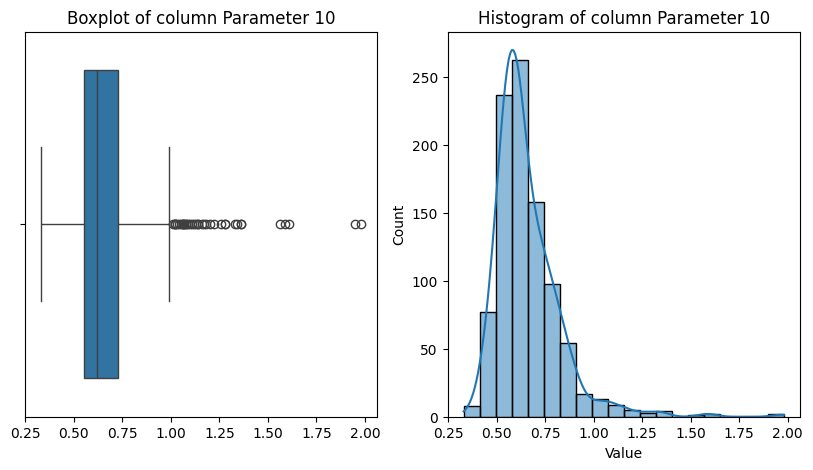

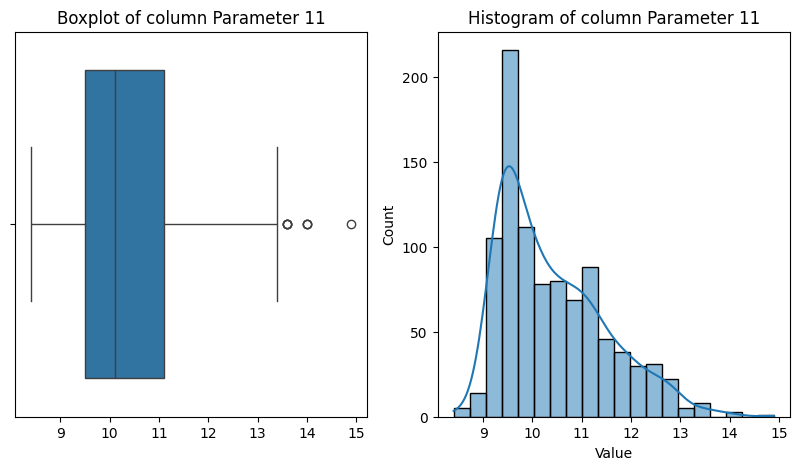

In [153]:
for col in x1_train.columns:
  plot_boxplot_and_hist(x1_train, col)

**Data Distribution of Test DataSet**

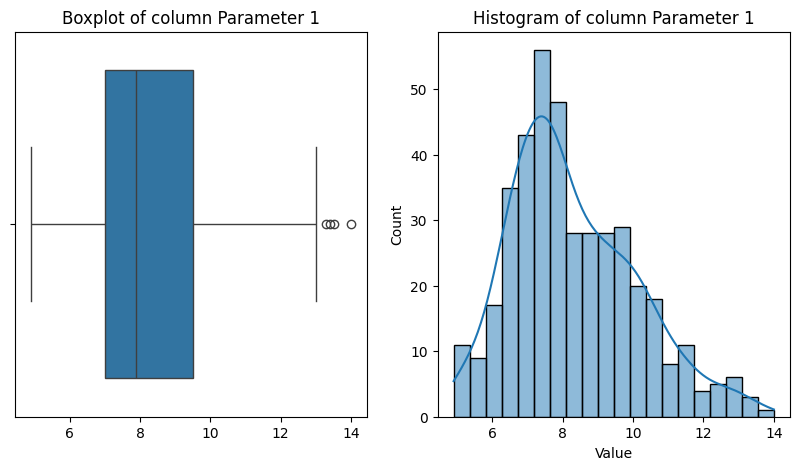

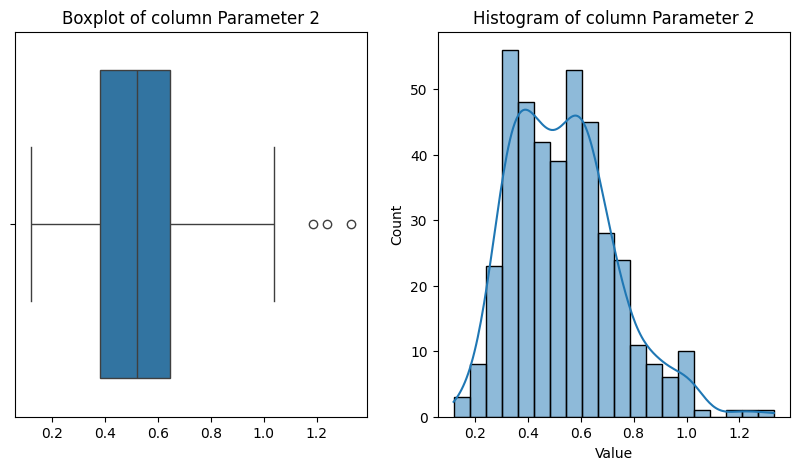

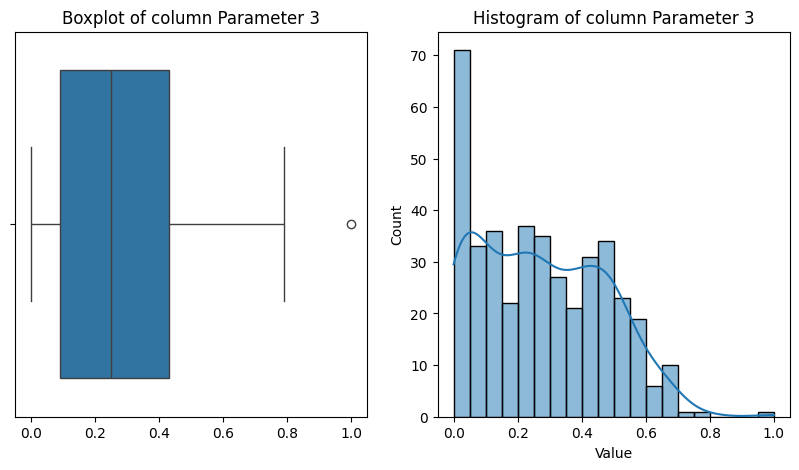

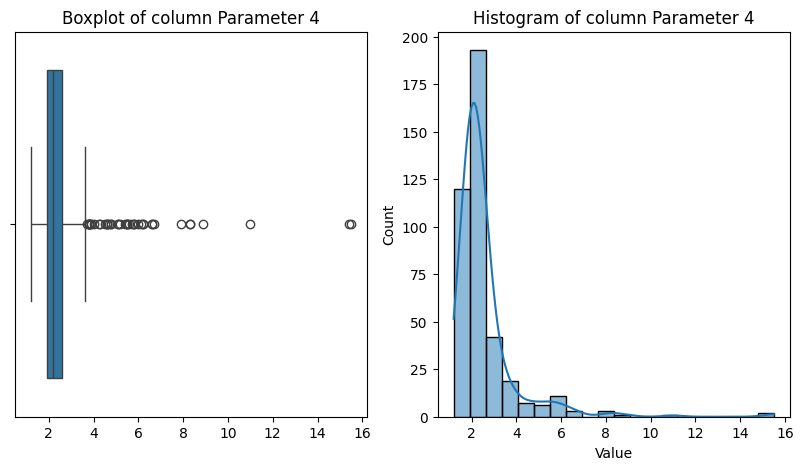

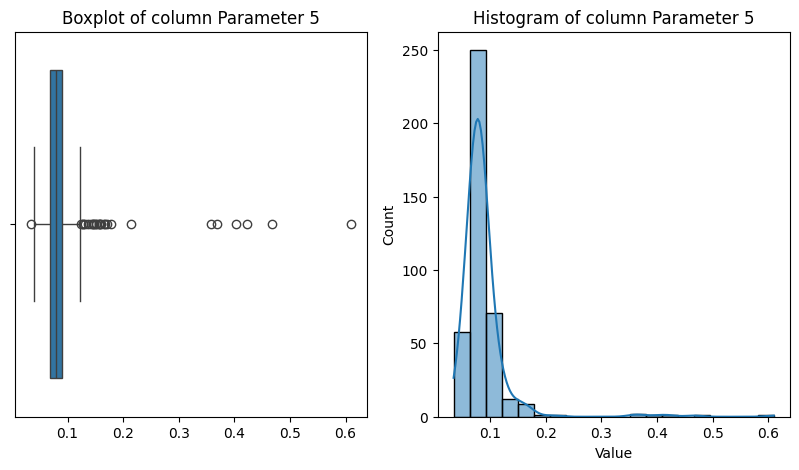

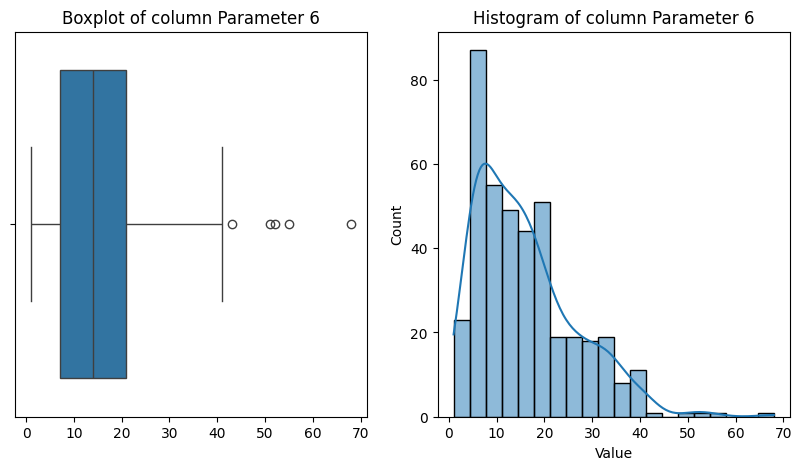

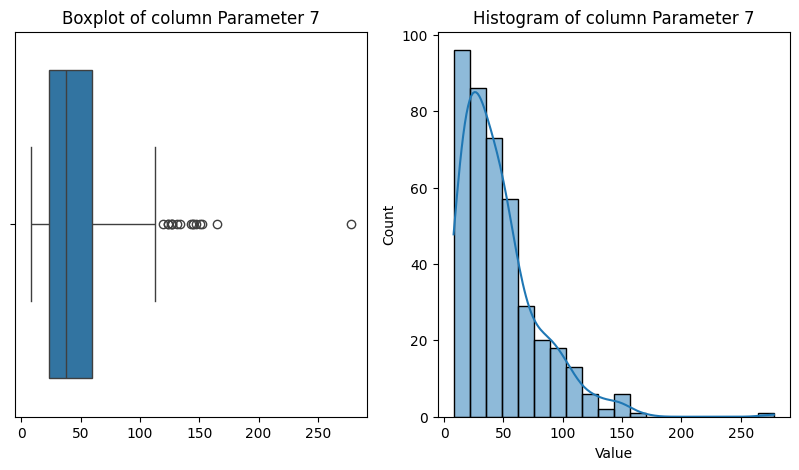

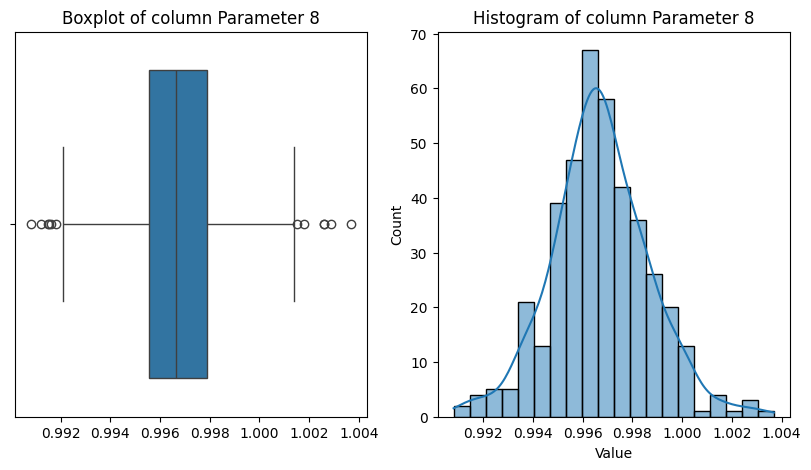

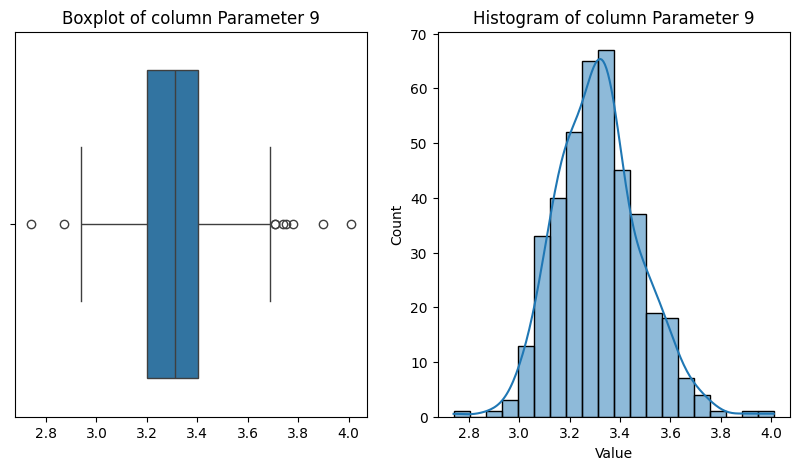

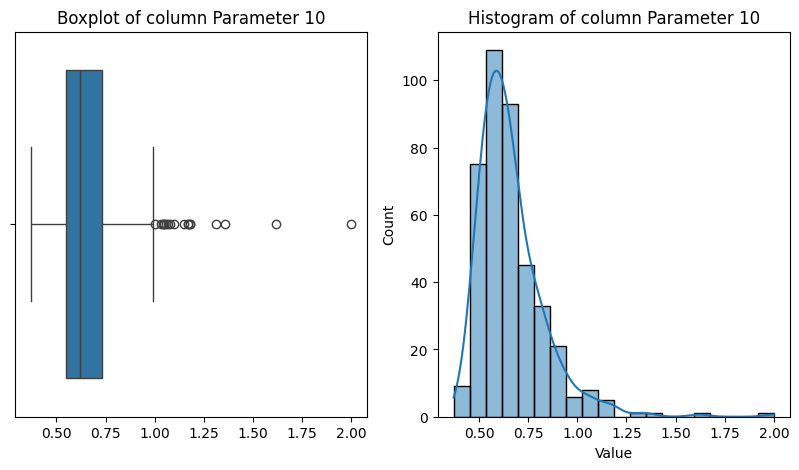

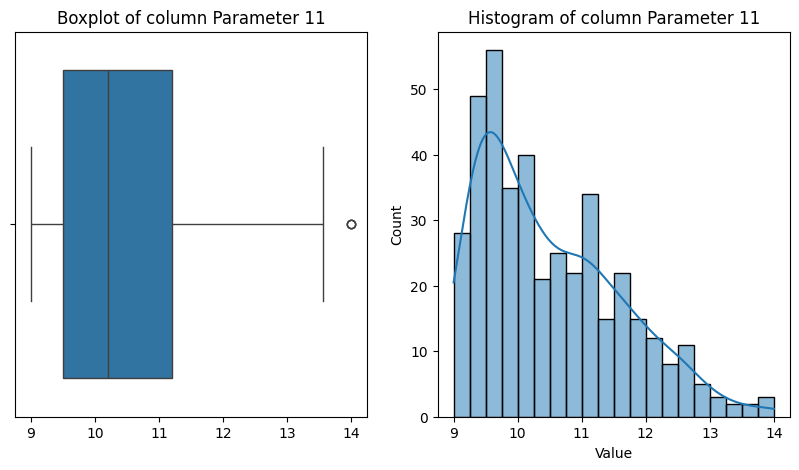

In [154]:
for col in x1_test.columns:
  plot_boxplot_and_hist(x1_test, col)

**Data Normalization using RobustScaler scaler**

In [155]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X1_train_scaled = pd.DataFrame(scaler.fit_transform(x1_train), columns=x1_train.columns)
X1_test_scaled = pd.DataFrame(scaler.transform(x1_test), columns=x1_test.columns)

**Data Distribution after Normalization of Testing Dataset**

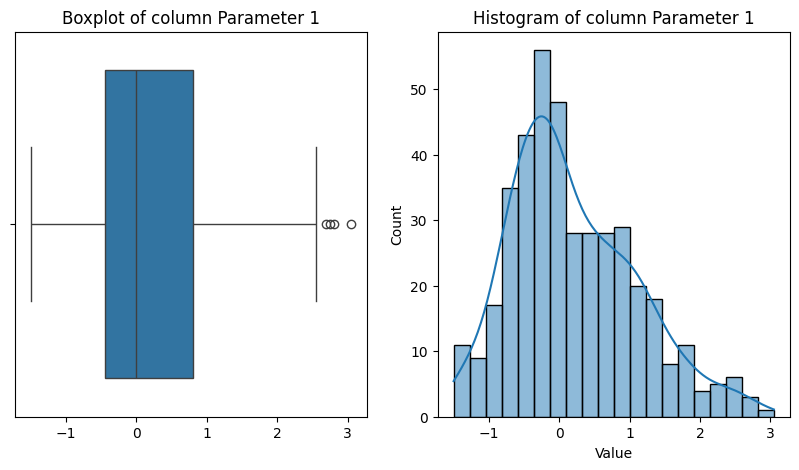

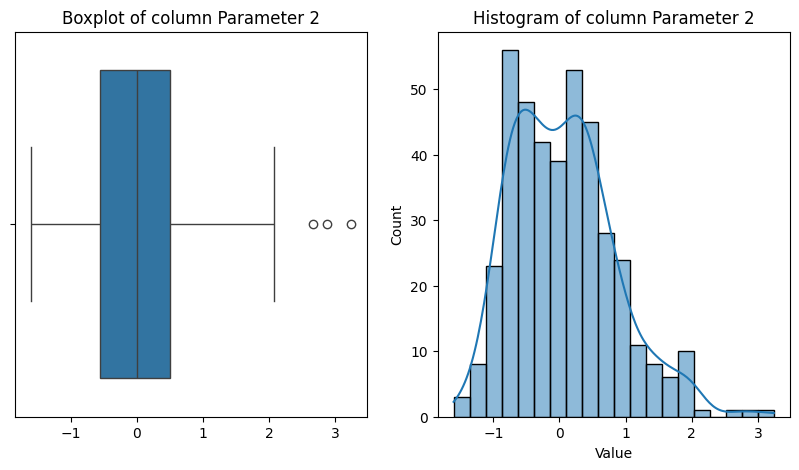

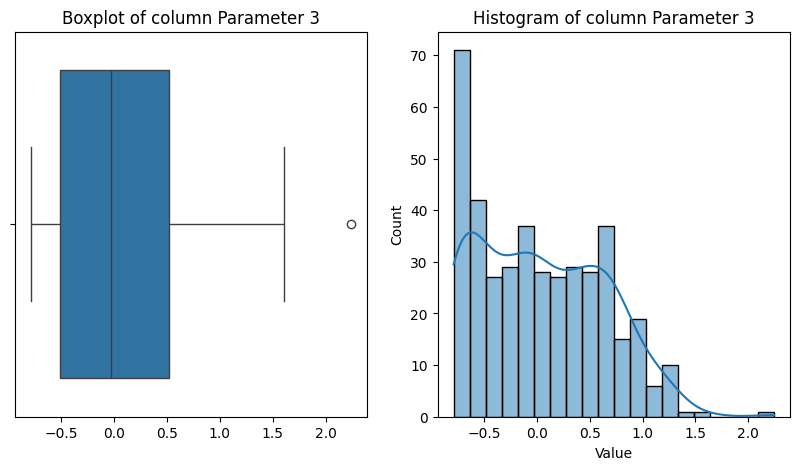

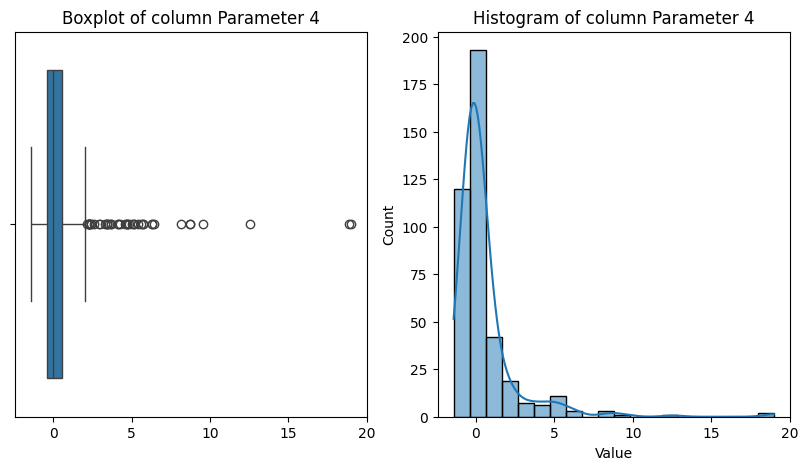

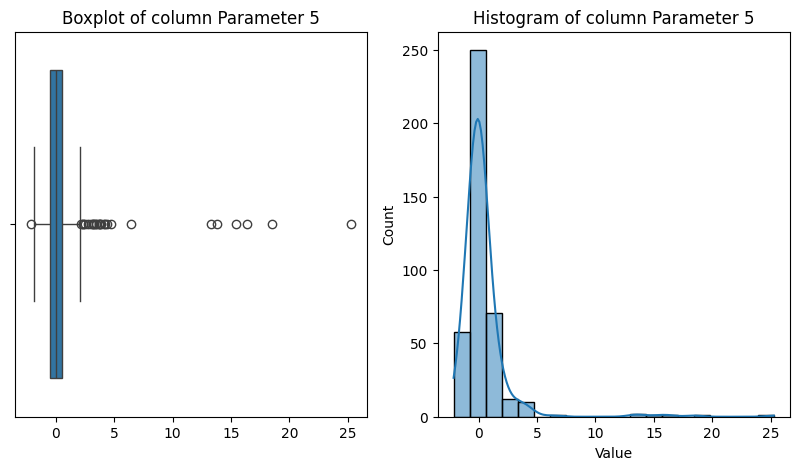

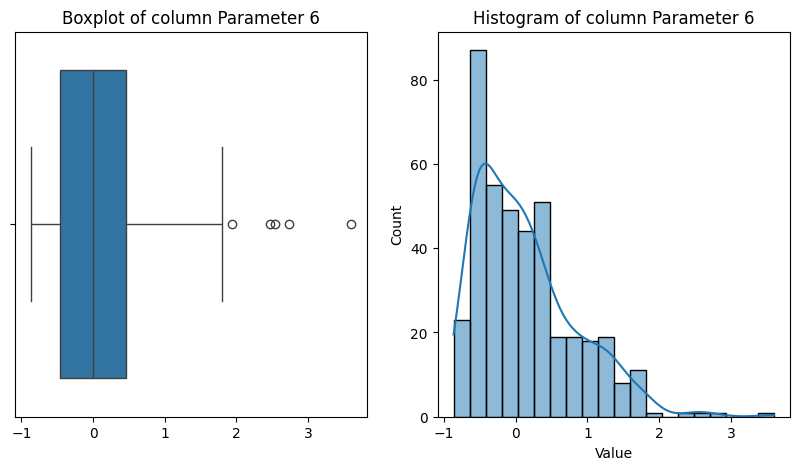

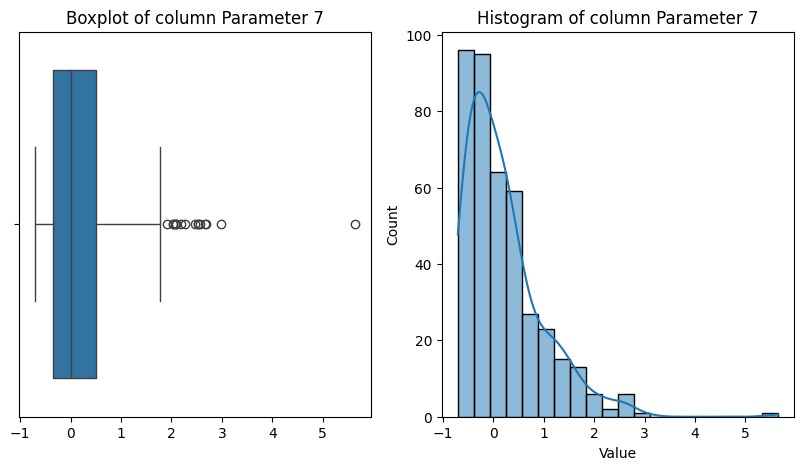

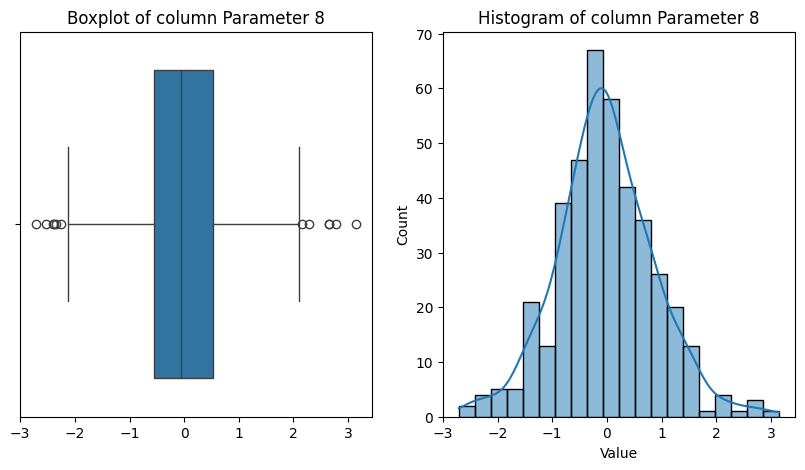

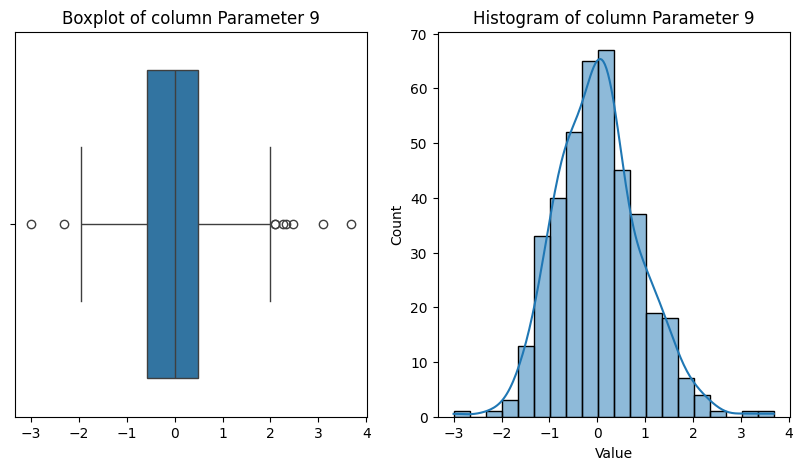

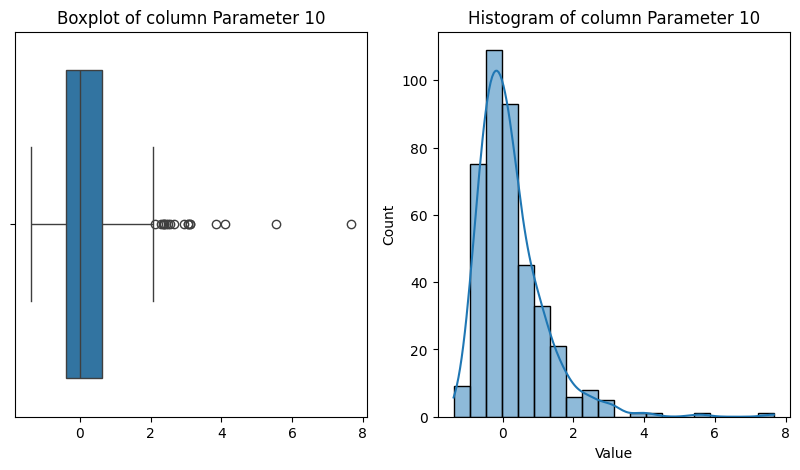

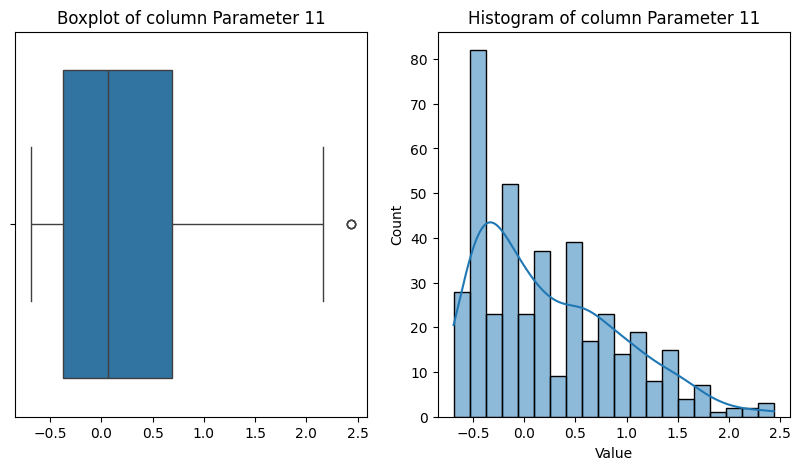

In [156]:
for col in X1_test_scaled.columns:
  plot_boxplot_and_hist(X1_test_scaled, col)

**Data Distribution after Normalization of Training\ Dataset**


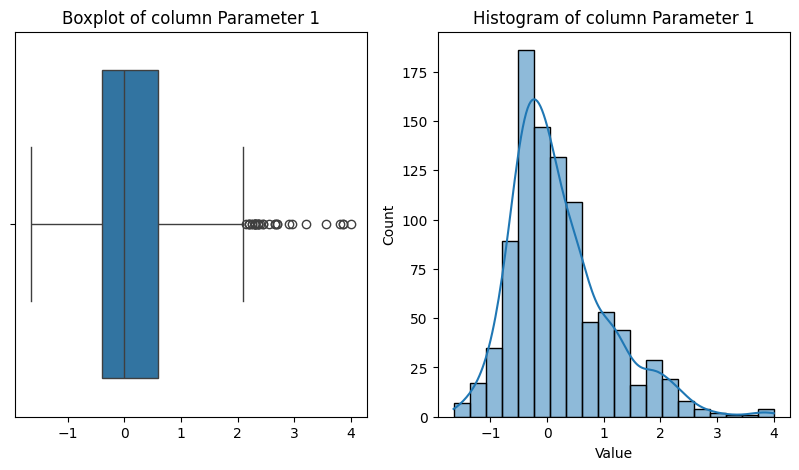

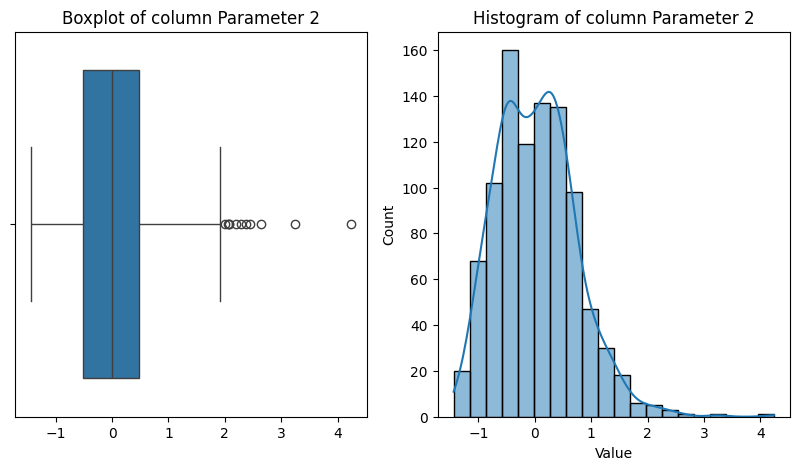

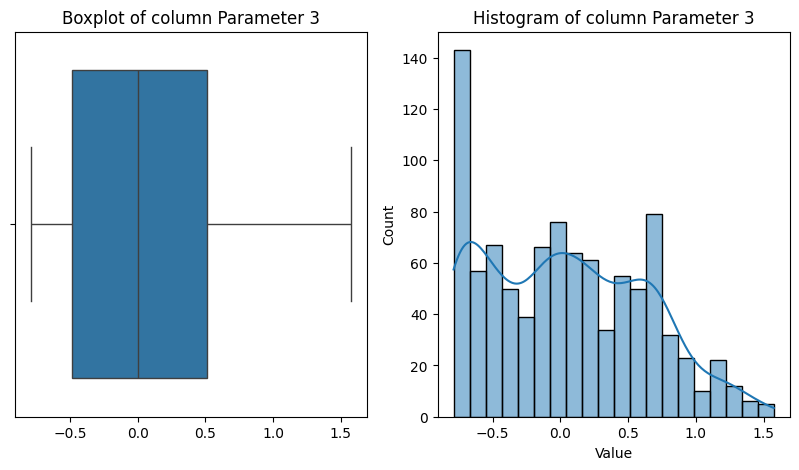

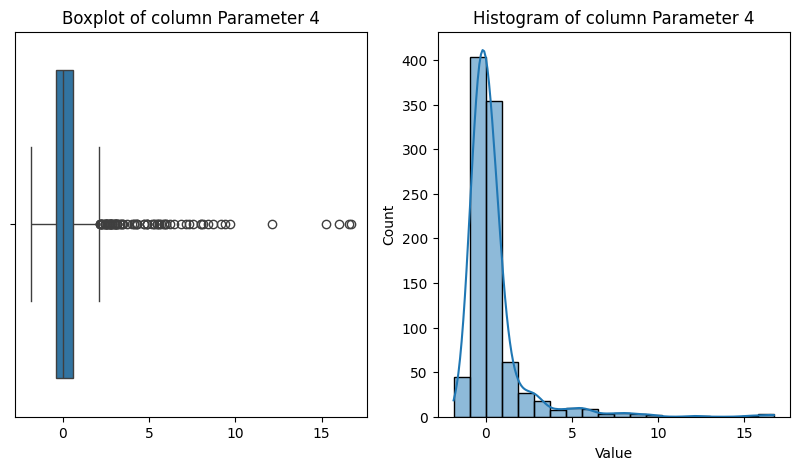

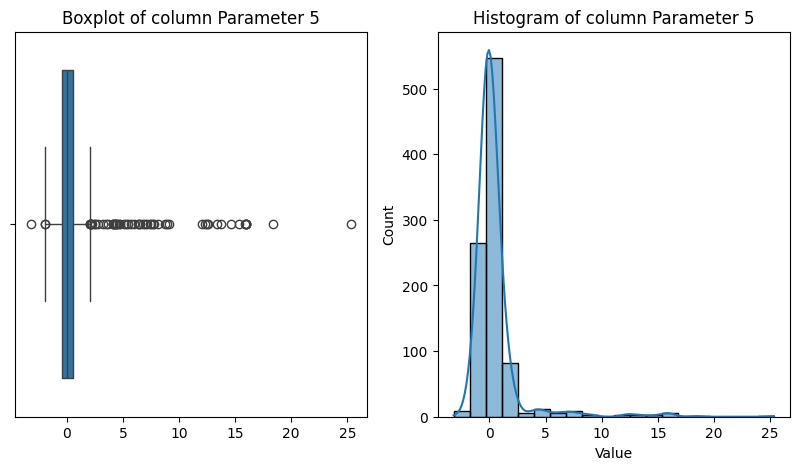

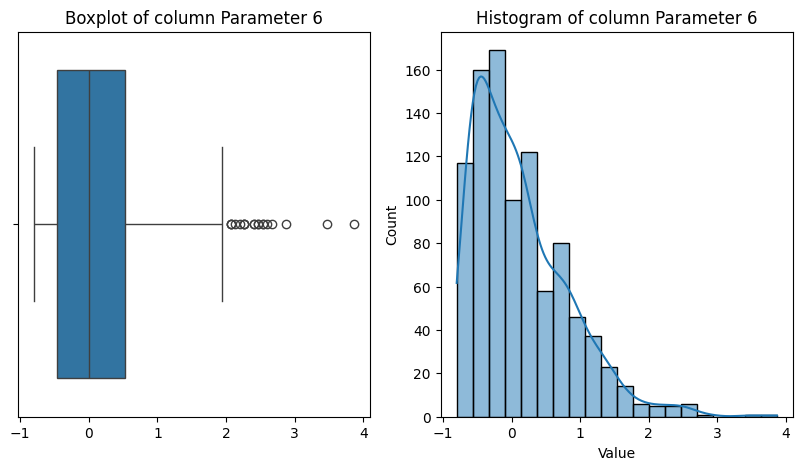

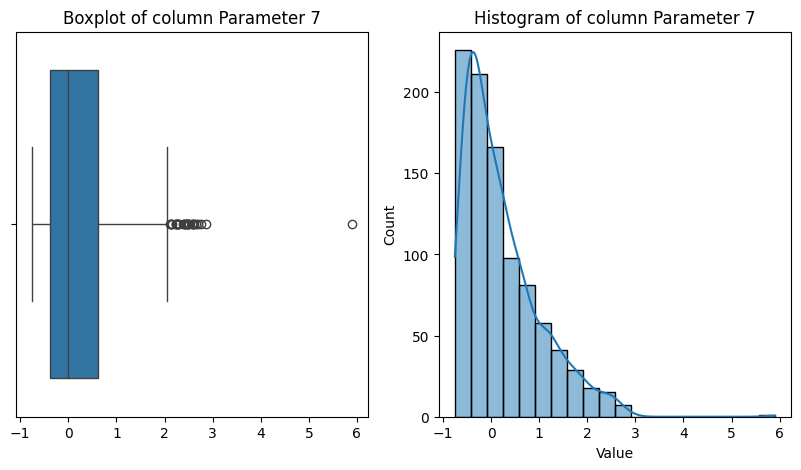

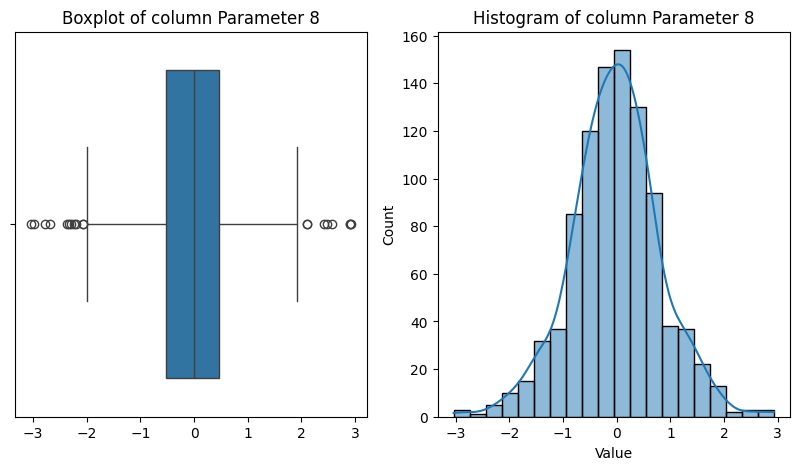

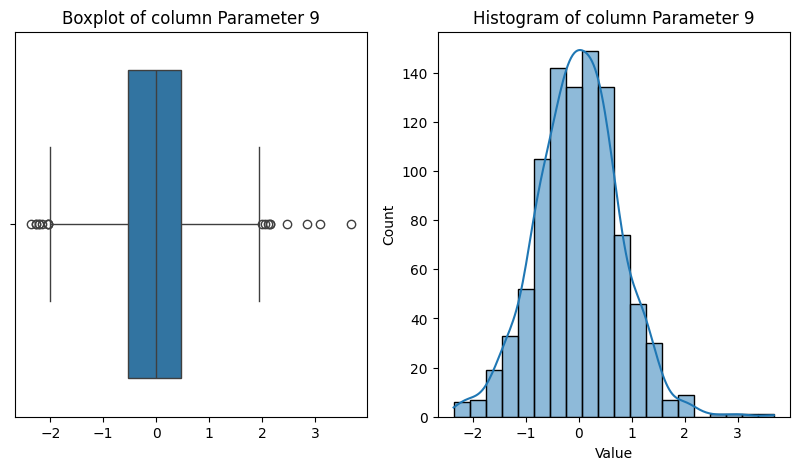

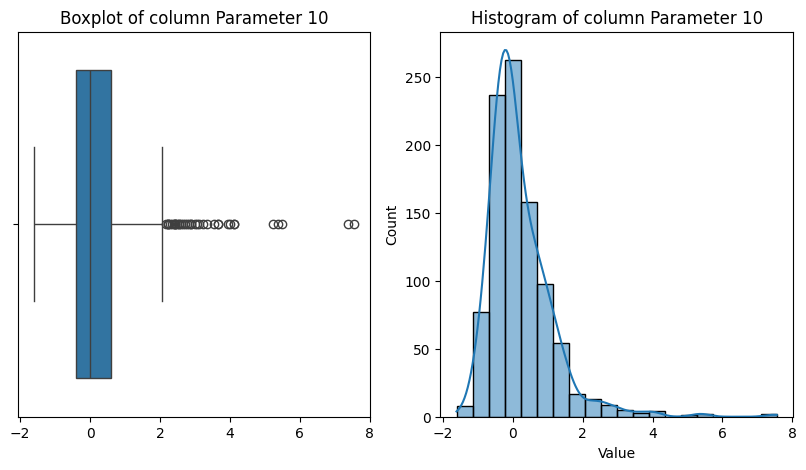

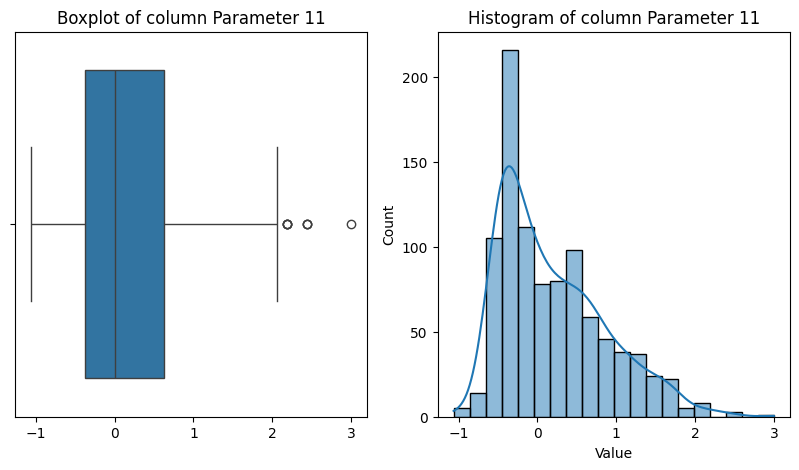

In [157]:
for col in X1_train_scaled.columns:
  plot_boxplot_and_hist(X1_train_scaled, col)

# **Q2 E** - Transform Labels into format acceptable by Neural Network

**BorderLine SMOTE technique to balance target variables**

In [158]:
x1_train.shape

(951, 11)

In [159]:
#using borderline SMOTE to balance target variable

from imblearn.over_sampling import BorderlineSMOTE

smote = BorderlineSMOTE(k_neighbors=2, random_state=42)
X1_train_resampled, Y1_train_resampled = smote.fit_resample(X1_train_scaled, y1_train)


**Transform Labels into format acceptable by Neural Network**

In [160]:
from tensorflow.keras.utils import to_categorical
Y1_train_cat_res = to_categorical(Y1_train_resampled)
Y1_test_cat = to_categorical(y1_test)

In [161]:
print('First 5 labels of Training DataSet as onehot encoded version: \n',Y1_train_cat_res[:5])

First 5 labels of Training DataSet as onehot encoded version: 
 [[0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [162]:
print('First 5 labels of Testing DataSet as onehot encoded version: \n',Y1_test_cat[:5])

First 5 labels of Testing DataSet as onehot encoded version: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]]


# **Q3 A** - Design a Neural Network to train a classifier.

In [163]:
# creating neural network model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.regularizers import l2
import tensorflow as tf



input_dim = X1_train_scaled.shape[1]

model = Sequential()

# adding internal nodes into NN

model.add(BatchNormalization(input_shape=(input_dim,)))


model.add(Dense(128, kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(56, kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.01))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(32, kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(14, kernel_initializer='he_uniform'))
model.add(LeakyReLU(alpha=0.01))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(Dense(9, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_17               │ (None, 11)                  │              44 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 56)                  │           7,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 56)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 56)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 56)                  │             224 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 32)                  │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 14)                  │             462 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 14)                  │              56 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 9)                   │             135 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,145 (47.44 KB)

 Trainable params: 11,663 (45.56 KB)

 Non-trainable params: 482 (1.88 KB)

# **Q3 B**- Train the classifier using previously designed Architecture

In [164]:
from functools import reduce
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

checkpoint = ModelCheckpoint("model_weights.h5", verbose=1, save_best_only=True, monitor='val_loss', mode='min')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0005, verbose=1)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=7,
    verbose=1,
    restore_best_weights=True
)

callbacks = [checkpoint, reduce_lr, early_stopping]

history_a = model.fit(
    X1_train_resampled, Y1_train_cat_res,
    epochs=100,
    batch_size=128,
    validation_data=(X1_test_scaled, Y1_test_cat),
    verbose=1,
    callbacks=callbacks
)


Epoch 1/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1055 - loss: 2.9354 
Epoch 1: val_loss improved from inf to 2.03752, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.1076 - loss: 2.9166 - val_accuracy: 0.3848 - val_loss: 2.0375 - learning_rate: 0.0010
Epoch 2/100
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1614 - loss: 2.5638 
Epoch 2: val_loss improved from 2.03752 to 1.99398, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1629 - loss: 2.5392 - val_accuracy: 0.3848 - val_loss: 1.9940 - learning_rate: 0.0010
Epoch 3/100
13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1850 - loss: 2.3597 
Epoch 3: val_loss improved from 1.99398 to 1.95944, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.1876 - loss: 2.3532 - val_accuracy: 0.3529 - val_loss: 1.9594 - learning_rate: 0.0010
Epoch 4/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2433 - loss: 2.1399 
Epoch 4: val_loss improved from 1.95944 to 1.93632, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2458 - loss: 2.1352 - val_accuracy: 0.3382 - val_loss: 1.9363 - learning_rate: 0.0010
Epoch 5/100
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2958 - loss: 2.0241 
Epoch 5: val_loss improved from 1.93632 to 1.90996, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2966 - loss: 2.0215 - val_accuracy: 0.3358 - val_loss: 1.9100 - learning_rate: 0.0010
Epoch 6/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3294 - loss: 1.9303  
Epoch 6: val_loss improved from 1.90996 to 1.87464, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3311 - loss: 1.9257 - val_accuracy: 0.3211 - val_loss: 1.8746 - learning_rate: 0.0010
Epoch 7/100
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3481 - loss: 1.8192 
Epoch 7: val_loss improved from 1.87464 to 1.84248, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3558 - loss: 1.8135 - val_accuracy: 0.3186 - val_loss: 1.8425 - learning_rate: 0.0010
Epoch 8/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.4219 - loss: 1.7333
Epoch 8: val_loss improved from 1.84248 to 1.82806, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4088 - loss: 1.7643 - val_accuracy: 0.3113 - val_loss: 1.8281 - learning_rate: 0.0010
Epoch 9/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4369 - loss: 1.6781  
Epoch 9: val_loss improved from 1.82806 to 1.80095, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4374 - loss: 1.6744 - val_accuracy: 0.3088 - val_loss: 1.8009 - learning_rate: 0.0010
Epoch 10/100
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4652 - loss: 1.5834 
Epoch 10: val_loss improved from 1.80095 to 1.79796, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4535 - loss: 1.6019 - val_accuracy: 0.3015 - val_loss: 1.7980 - learning_rate: 0.0010
Epoch 11/100
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4498 - loss: 1.5733  
Epoch 11: val_loss improved from 1.79796 to 1.77429, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4536 - loss: 1.5675 - val_accuracy: 0.3137 - val_loss: 1.7743 - learning_rate: 0.0010
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4772 - loss: 1.4669
Epoch 12: val_loss improved from 1.77429 to 1.75655, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4772 - loss: 1.4681 - val_accuracy: 0.3235 - val_loss: 1.7565 - learning_rate: 0.0010
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4765 - loss: 1.4903
Epoch 13: val_loss improved from 1.75655 to 1.73749, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4767 - loss: 1.4898 - val_accuracy: 0.3260 - val_loss: 1.7375 - learning_rate: 0.0010
Epoch 14/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4825 - loss: 1.4716  
Epoch 14: val_loss improved from 1.73749 to 1.71686, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4840 - loss: 1.4684 - val_accuracy: 0.3260 - val_loss: 1.7169 - learning_rate: 0.0010
Epoch 15/100
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5100 - loss: 1.3898 
Epoch 15: val_loss improved from 1.71686 to 1.68842, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5100 - loss: 1.3927 - val_accuracy: 0.3333 - val_loss: 1.6884 - learning_rate: 0.0010
Epoch 16/100
13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5170 - loss: 1.3575  
Epoch 16: val_loss improved from 1.68842 to 1.66360, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5172 - loss: 1.3584 - val_accuracy: 0.3505 - val_loss: 1.6636 - learning_rate: 0.0010
Epoch 17/100
13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5153 - loss: 1.3675  
Epoch 17: val_loss improved from 1.66360 to 1.64439, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5162 - loss: 1.3621 - val_accuracy: 0.3554 - val_loss: 1.6444 - learning_rate: 0.0010
Epoch 18/100
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5018 - loss: 1.3446 
Epoch 18: val_loss improved from 1.64439 to 1.63093, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5032 - loss: 1.3366 - val_accuracy: 0.3578 - val_loss: 1.6309 - learning_rate: 0.0010
Epoch 19/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5327 - loss: 1.3076  
Epoch 19: val_loss improved from 1.63093 to 1.60897, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5320 - loss: 1.3086 - val_accuracy: 0.3676 - val_loss: 1.6090 - learning_rate: 0.0010
Epoch 20/100
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5272 - loss: 1.2849  
Epoch 20: val_loss improved from 1.60897 to 1.59397, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5271 - loss: 1.2842 - val_accuracy: 0.3676 - val_loss: 1.5940 - learning_rate: 0.0010
Epoch 21/100
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5527 - loss: 1.2671  
Epoch 21: val_loss improved from 1.59397 to 1.58151, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5482 - loss: 1.2653 - val_accuracy: 0.3701 - val_loss: 1.5815 - learning_rate: 0.0010
Epoch 22/100
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5363 - loss: 1.2239 
Epoch 22: val_loss improved from 1.58151 to 1.56312, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5351 - loss: 1.2278 - val_accuracy: 0.3725 - val_loss: 1.5631 - learning_rate: 0.0010
Epoch 23/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5480 - loss: 1.2145 
Epoch 23: val_loss improved from 1.56312 to 1.55327, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5484 - loss: 1.2134 - val_accuracy: 0.3775 - val_loss: 1.5533 - learning_rate: 0.0010
Epoch 24/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6094 - loss: 1.1244
Epoch 24: val_loss improved from 1.55327 to 1.51962, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5704 - loss: 1.1920 - val_accuracy: 0.3873 - val_loss: 1.5196 - learning_rate: 0.0010
Epoch 25/100
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5583 - loss: 1.2049  
Epoch 25: val_loss improved from 1.51962 to 1.49397, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5564 - loss: 1.2080 - val_accuracy: 0.3848 - val_loss: 1.4940 - learning_rate: 0.0010
Epoch 26/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5625 - loss: 1.2018
Epoch 26: val_loss improved from 1.49397 to 1.47934, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5593 - loss: 1.1710 - val_accuracy: 0.3995 - val_loss: 1.4793 - learning_rate: 0.0010
Epoch 27/100
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5596 - loss: 1.1737  
Epoch 27: val_loss improved from 1.47934 to 1.47048, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5597 - loss: 1.1751 - val_accuracy: 0.4069 - val_loss: 1.4705 - learning_rate: 0.0010
Epoch 28/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5751 - loss: 1.1192  
Epoch 28: val_loss improved from 1.47048 to 1.45320, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5753 - loss: 1.1196 - val_accuracy: 0.4020 - val_loss: 1.4532 - learning_rate: 0.0010
Epoch 29/100
13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5508 - loss: 1.1774  
Epoch 29: val_loss improved from 1.45320 to 1.44028, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5521 - loss: 1.1724 - val_accuracy: 0.4044 - val_loss: 1.4403 - learning_rate: 0.0010
Epoch 30/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5940 - loss: 1.0915  
Epoch 30: val_loss improved from 1.44028 to 1.43175, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5902 - loss: 1.1013 - val_accuracy: 0.4093 - val_loss: 1.4318 - learning_rate: 0.0010
Epoch 31/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5691 - loss: 1.0891  
Epoch 31: val_loss improved from 1.43175 to 1.41507, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5686 - loss: 1.0904 - val_accuracy: 0.4191 - val_loss: 1.4151 - learning_rate: 0.0010
Epoch 32/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6484 - loss: 1.0388
Epoch 32: val_loss did not improve from 1.41507
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5878 - loss: 1.0767 - val_accuracy: 0.4093 - val_loss: 1.4192 - learning_rate: 0.0010
Epoch 33/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6094 - loss: 1.0841
Epoch 33: val_loss improved from 1.41507 to 1.41022, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5755 - loss: 1.1021 - val_accuracy: 0.4118 - val_loss: 1.4102 - learning_rate: 0.0010
Epoch 34/100
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5710 - loss: 1.1163  
Epoch 34: val_loss improved from 1.41022 to 1.38236, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5716 - loss: 1.1142 - val_accuracy: 0.4240 - val_loss: 1.3824 - learning_rate: 0.0010
Epoch 35/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6018 - loss: 1.0598  
Epoch 35: val_loss improved from 1.38236 to 1.36069, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5989 - loss: 1.0642 - val_accuracy: 0.4289 - val_loss: 1.3607 - learning_rate: 0.0010
Epoch 36/100
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5776 - loss: 1.0552  
Epoch 36: val_loss improved from 1.36069 to 1.34665, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5776 - loss: 1.0626 - val_accuracy: 0.4387 - val_loss: 1.3466 - learning_rate: 0.0010
Epoch 37/100
13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6218 - loss: 0.9979 
Epoch 37: val_loss improved from 1.34665 to 1.32764, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6177 - loss: 1.0079 - val_accuracy: 0.4412 - val_loss: 1.3276 - learning_rate: 0.0010
Epoch 38/100
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5920 - loss: 1.0641 
Epoch 38: val_loss did not improve from 1.32764
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5929 - loss: 1.0628 - val_accuracy: 0.4387 - val_loss: 1.3346 - learning_rate: 0.0010
Epoch 39/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6072 - loss: 1.0325  
Epoch 39: val_loss did not improve from 1.32764
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6070 - loss: 1.0327 - val_accuracy: 0.4363 - val_loss: 1.3315 - learning_rate: 0.0010
Epoch 40/100
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6097 - loss: 1.0116  
Epoch 40: val_loss improved from 1.32764 to 1.32384, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6082 - loss: 1.0194 - val_accuracy: 0.4412 - val_loss: 1.3238 - learning_rate: 0.0010
Epoch 41/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5808 - loss: 1.0433 
Epoch 41: val_loss improved from 1.32384 to 1.31870, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5844 - loss: 1.0395 - val_accuracy: 0.4436 - val_loss: 1.3187 - learning_rate: 0.0010
Epoch 42/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5835 - loss: 1.0351 
Epoch 42: val_loss did not improve from 1.31870
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5852 - loss: 1.0351 - val_accuracy: 0.4363 - val_loss: 1.3265 - learning_rate: 0.0010
Epoch 43/100
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6140 - loss: 1.0227 
Epoch 43: val_loss improved from 1.31870 to 1.30891, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6138 - loss: 1.0215 - val_accuracy: 0.4485 - val_loss: 1.3089 - learning_rate: 0.0010
Epoch 44/100
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6070 - loss: 1.0287 
Epoch 44: val_loss did not improve from 1.30891
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6082 - loss: 1.0273 - val_accuracy: 0.4534 - val_loss: 1.3145 - learning_rate: 0.0010
Epoch 45/100
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6219 - loss: 0.9566  
Epoch 45: val_loss did not improve from 1.30891
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6181 - loss: 0.9667 - val_accuracy: 0.4559 - val_loss: 1.3185 - learning_rate: 0.0010
Epoch 46/100
13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6124 - loss: 0.9896 
Epoch 46: val_loss did not improve from 1.30891
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6151 - loss: 0.9877 - val_accuracy: 0.4583 - val_loss: 1.3135 - learning_rate: 0.0010
Epoch 47/100
16/16 ━━━━━━━━━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6483 - loss: 0.9350 - val_accuracy: 0.4583 - val_loss: 1.2951 - learning_rate: 0.0010
Epoch 50/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6294 - loss: 0.9525  
Epoch 50: val_loss improved from 1.29510 to 1.29306, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6303 - loss: 0.9528 - val_accuracy: 0.4632 - val_loss: 1.2931 - learning_rate: 0.0010
Epoch 51/100
 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6589 - loss: 0.9300 
Epoch 51: val_loss improved from 1.29306 to 1.28875, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6466 - loss: 0.9513 - val_accuracy: 0.4534 - val_loss: 1.2887 - learning_rate: 0.0010
Epoch 52/100
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6218 - loss: 0.9810 
Epoch 52: val_loss improved from 1.28875 to 1.28590, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6225 - loss: 0.9736 - val_accuracy: 0.4608 - val_loss: 1.2859 - learning_rate: 0.0010
Epoch 53/100
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6250 - loss: 0.9513 
Epoch 53: val_loss did not improve from 1.28590
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6254 - loss: 0.9509 - val_accuracy: 0.4534 - val_loss: 1.2892 - learning_rate: 0.0010
Epoch 54/100
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6231 - loss: 0.9605 
Epoch 54: val_loss improved from 1.28590 to 1.27793, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6254 - loss: 0.9542 - val_accuracy: 0.4559 - val_loss: 1.2779 - learning_rate: 0.0010
Epoch 55/100
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6193 - loss: 0.9389 
Epoch 55: val_loss improved from 1.27793 to 1.27601, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6196 - loss: 0.9471 - val_accuracy: 0.4461 - val_loss: 1.2760 - learning_rate: 0.0010
Epoch 56/100
10/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6350 - loss: 0.9681  
Epoch 56: val_loss improved from 1.27601 to 1.27253, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6347 - loss: 0.9572 - val_accuracy: 0.4608 - val_loss: 1.2725 - learning_rate: 0.0010
Epoch 57/100
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6695 - loss: 0.8838 
Epoch 57: val_loss did not improve from 1.27253
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6662 - loss: 0.8893 - val_accuracy: 0.4559 - val_loss: 1.2798 - learning_rate: 0.0010
Epoch 58/100
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6468 - loss: 0.9164  
Epoch 58: val_loss improved from 1.27253 to 1.26955, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6462 - loss: 0.9162 - val_accuracy: 0.4534 - val_loss: 1.2696 - learning_rate: 0.0010
Epoch 59/100
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6415 - loss: 0.8975 
Epoch 59: val_loss improved from 1.26955 to 1.26666, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6417 - loss: 0.8996 - val_accuracy: 0.4657 - val_loss: 1.2667 - learning_rate: 0.0010
Epoch 60/100
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6221 - loss: 0.9462  
Epoch 60: val_loss did not improve from 1.26666
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6258 - loss: 0.9430 - val_accuracy: 0.4608 - val_loss: 1.2719 - learning_rate: 0.0010
Epoch 61/100
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6665 - loss: 0.8720  
Epoch 61: val_loss did not improve from 1.26666
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6597 - loss: 0.8895 - val_accuracy: 0.4534 - val_loss: 1.2797 - learning_rate: 0.0010
Epoch 62/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6614 - loss: 0.8711  
Epoch 62: val_loss did not improve from 1.26666
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6601 - loss: 0.8720 - val_accuracy: 0.4534 - val_loss: 1.2785 - learning_rate: 0.0010
Epoch 63/100
14/16 ━━━━━━━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6773 - loss: 0.8702 - val_accuracy: 0.4608 - val_loss: 1.2603 - learning_rate: 0.0010
Epoch 65/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6530 - loss: 0.9088 
Epoch 65: val_loss improved from 1.26032 to 1.25899, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6543 - loss: 0.9093 - val_accuracy: 0.4657 - val_loss: 1.2590 - learning_rate: 0.0010
Epoch 66/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6286 - loss: 0.9394 
Epoch 66: val_loss did not improve from 1.25899
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6294 - loss: 0.9374 - val_accuracy: 0.4657 - val_loss: 1.2642 - learning_rate: 0.0010
Epoch 67/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6583 - loss: 0.8899 
Epoch 67: val_loss did not improve from 1.25899
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6563 - loss: 0.8924 - val_accuracy: 0.4681 - val_loss: 1.2696 - learning_rate: 0.0010
Epoch 68/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6470 - loss: 0.9471  
Epoch 68: val_loss did not improve from 1.25899
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6477 - loss: 0.9453 - val_accuracy: 0.4681 - val_loss: 1.2733 - learning_rate: 0.0010
Epoch 69/100
 1/16 ━━━━━━━━━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6715 - loss: 0.8836 - val_accuracy: 0.4755 - val_loss: 1.2518 - learning_rate: 0.0010
Epoch 73/100
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6486 - loss: 0.8742  
Epoch 73: val_loss did not improve from 1.25180
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6518 - loss: 0.8759 - val_accuracy: 0.4681 - val_loss: 1.2653 - learning_rate: 0.0010
Epoch 74/100
13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6777 - loss: 0.8523 
Epoch 74: val_loss improved from 1.25180 to 1.24712, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6746 - loss: 0.8566 - val_accuracy: 0.4730 - val_loss: 1.2471 - learning_rate: 0.0010
Epoch 75/100
 9/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6765 - loss: 0.8213  
Epoch 75: val_loss did not improve from 1.24712
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6715 - loss: 0.8396 - val_accuracy: 0.4853 - val_loss: 1.2489 - learning_rate: 0.0010
Epoch 76/100
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6876 - loss: 0.7973 
Epoch 76: val_loss did not improve from 1.24712
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6870 - loss: 0.8003 - val_accuracy: 0.4755 - val_loss: 1.2647 - learning_rate: 0.0010
Epoch 77/100
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6534 - loss: 0.8653  
Epoch 77: val_loss did not improve from 1.24712
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6548 - loss: 0.8638 - val_accuracy: 0.4853 - val_loss: 1.2527 - learning_rate: 0.0010
Epoch 78/100
13/16 ━━━━━━━━━━━━━━━━

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6783 - loss: 0.8479 - val_accuracy: 0.5025 - val_loss: 1.2429 - learning_rate: 0.0010
Epoch 80/100
 1/16 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.6875 - loss: 0.8876
Epoch 80: val_loss did not improve from 1.24286
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6740 - loss: 0.8587 - val_accuracy: 0.4902 - val_loss: 1.2499 - learning_rate: 0.0010
Epoch 81/100
13/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6690 - loss: 0.8413 
Epoch 81: val_loss did not improve from 1.24286
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6705 - loss: 0.8370 - val_accuracy: 0.4926 - val_loss: 1.2477 - learning_rate: 0.0010
Epoch 82/100
15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6616 - loss: 0.8236 
Epoch 82: val_loss improved from 1.24286 to 1.22295, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6624 - loss: 0.8248 - val_accuracy: 0.4926 - val_loss: 1.2230 - learning_rate: 0.0010
Epoch 83/100
14/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6425 - loss: 0.8862  
Epoch 83: val_loss improved from 1.22295 to 1.20782, saving model to model_weights.h5


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6459 - loss: 0.8801 - val_accuracy: 0.4877 - val_loss: 1.2078 - learning_rate: 0.0010
Epoch 84/100
11/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6704 - loss: 0.8303 
Epoch 84: val_loss did not improve from 1.20782
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6709 - loss: 0.8310 - val_accuracy: 0.5025 - val_loss: 1.2261 - learning_rate: 0.0010
Epoch 85/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6635 - loss: 0.8556  
Epoch 85: val_loss did not improve from 1.20782
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6638 - loss: 0.8549 - val_accuracy: 0.4951 - val_loss: 1.2333 - learning_rate: 0.0010
Epoch 86/100
12/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6932 - loss: 0.8310  
Epoch 86: val_loss did not improve from 1.20782
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6950 - loss: 0.8218 - val_accuracy: 0.4779 - val_loss: 1.2362 - learning_rate: 0.0010
Epoch 87/100
13/16 ━━━━━━━━━━━━━━━━

# **Q3 C** - Plot 2 separate visuals. i. Training Loss and Validation Loss ii. Training Accuracy and Validation Accuracy

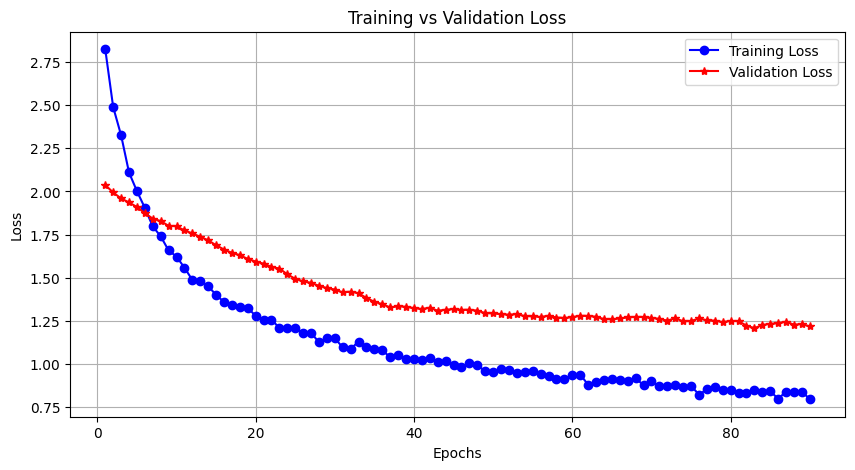

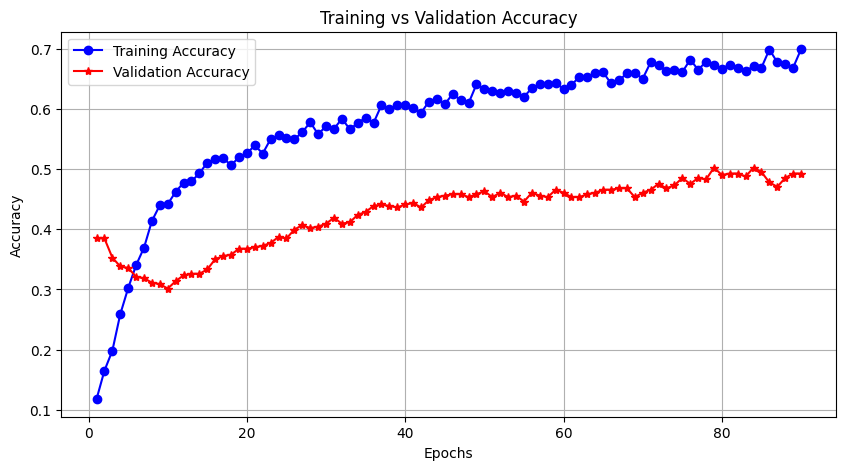

In [165]:
import matplotlib.pyplot as plt

def plot_training_history(history):
  loss = history_a.history['loss']
  val_loss = history_a.history['val_loss']
  accuracy = history_a.history['accuracy']
  val_accuracy = history_a.history['val_accuracy']
  epochs = range(1, len(loss) + 1)
  plt.figure(figsize=(10, 5))
  plt.plot(epochs, loss, 'bo-', label='Training Loss')
  plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Training vs Validation Loss')
  plt.legend()
  plt.grid(True)
  plt.show()

  plt.figure(figsize=(10, 5))
  plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
  plt.plot(epochs, val_accuracy, 'r*-', label='Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title('Training vs Validation Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()


plot_training_history(history_a)



# **Q3 D** - Design new architecture/update existing architecture in attempt to improve the performance of the model.

In [166]:
from tensorflow.keras.layers import ELU  # Import ELU layer

model2 = Sequential()

# Adding internal nodes into the neural network
model2.add(Dense(256, input_shape=(input_dim,)))
model2.add(ELU(alpha=0.01))  # Using ELU layer here
model2.add(Dropout(0.4))
model2.add(BatchNormalization())

model2.add(Dense(256, input_shape=(input_dim,)))

model2.add(Dense(128, kernel_initializer='lecun_normal'))
model2.add(ELU(alpha=0.01))  # Using ELU layer here
model2.add(Dropout(0.4))
model2.add(BatchNormalization())

model2.add(Dense(128, kernel_initializer='lecun_normal'))


model2.add(Dense(56, kernel_initializer='lecun_normal'))
model2.add(ELU(alpha=0.01))  # Using ELU layer here
model2.add(Dropout(0.4))
model2.add(BatchNormalization())

model2.add(Dense(56, kernel_initializer='lecun_normal'))

model2.add(Dense(32, kernel_initializer='lecun_normal'))
model2.add(ELU(alpha=0.01))  # Using ELU layer here
model2.add(Dropout(0.5))


optimizer = tf.keras.optimizers.AdamW(learning_rate=1e-2, clipnorm=1.0)




# Final output layer
model2.add(Dense(9, activation='softmax'))  # Assuming 9 classes for multi-class classification

# Compile the model
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Display the model summary
model2.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 256)                 │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_8 (ELU)                          │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_9 (ELU)                          │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 56)                  │           7,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_10 (ELU)                         │ (None, 56)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 56)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 56)                  │             224 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 56)                  │           3,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 32)                  │           1,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ elu_11 (ELU)                         │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 9)                   │             297 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 132,569 (517.85 KB)

 Trainable params: 131,689 (514.41 KB)

 Non-trainable params: 880 (3.44 KB)

In [167]:
from functools import reduce
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

checkpoint = ModelCheckpoint("model_weights.h5", verbose=1, save_best_only=True, monitor='val_loss', mode='min')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0001, verbose=1)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

callbacks = [checkpoint, reduce_lr, early_stopping]

history_a2 = model2.fit(
    X1_train_resampled, Y1_train_cat_res,
    epochs=60,
    batch_size=256,
    validation_data=(X1_test_scaled, Y1_test_cat),
    validation_split=0.2,
    verbose=1,
    callbacks=callbacks
)


Epoch 1/60
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2458 - loss: 2.2439
Epoch 1: val_loss improved from inf to 2.59989, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.2730 - loss: 2.1168 - val_accuracy: 0.2230 - val_loss: 2.5999 - learning_rate: 0.0100
Epoch 2/60
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4625 - loss: 1.3129 
Epoch 2: val_loss did not improve from 2.59989
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4676 - loss: 1.2947 - val_accuracy: 0.2843 - val_loss: 2.9596 - learning_rate: 0.0100
Epoch 3/60
5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5337 - loss: 1.1278
Epoch 3: val_loss improved from 2.59989 to 1.57751, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5346 - loss: 1.1187 - val_accuracy: 0.3922 - val_loss: 1.5775 - learning_rate: 0.0100
Epoch 4/60
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6046 - loss: 1.0183
Epoch 4: val_loss improved from 1.57751 to 1.31472, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.5986 - loss: 1.0254 - val_accuracy: 0.4461 - val_loss: 1.3147 - learning_rate: 0.0100
Epoch 5/60
5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5683 - loss: 1.0321 
Epoch 5: val_loss improved from 1.31472 to 1.27169, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5809 - loss: 1.0152 - val_accuracy: 0.4338 - val_loss: 1.2717 - learning_rate: 0.0100
Epoch 6/60
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6510 - loss: 0.9092
Epoch 6: val_loss improved from 1.27169 to 1.07653, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6520 - loss: 0.9106 - val_accuracy: 0.5098 - val_loss: 1.0765 - learning_rate: 0.0100
Epoch 7/60
5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6507 - loss: 0.8453 
Epoch 7: val_loss did not improve from 1.07653
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6490 - loss: 0.8547 - val_accuracy: 0.4975 - val_loss: 1.1091 - learning_rate: 0.0100
Epoch 8/60
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6808 - loss: 0.8258
Epoch 8: val_loss improved from 1.07653 to 1.05993, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6797 - loss: 0.8324 - val_accuracy: 0.5221 - val_loss: 1.0599 - learning_rate: 0.0100
Epoch 9/60
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6610 - loss: 0.8139 
Epoch 9: val_loss did not improve from 1.05993
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6677 - loss: 0.8106 - val_accuracy: 0.5294 - val_loss: 1.0621 - learning_rate: 0.0100
Epoch 10/60
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7148 - loss: 0.7509 
Epoch 10: val_loss improved from 1.05993 to 1.01777, saving model to model_weights.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7077 - loss: 0.7649 - val_accuracy: 0.5490 - val_loss: 1.0178 - learning_rate: 0.0100
Epoch 11/60
5/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6838 - loss: 0.7884
Epoch 11: val_loss did not improve from 1.01777
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6893 - loss: 0.7739 - val_accuracy: 0.5466 - val_loss: 1.0232 - learning_rate: 0.0100
Epoch 12/60
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6955 - loss: 0.7479 
Epoch 12: val_loss did not improve from 1.01777
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6977 - loss: 0.7457 - val_accuracy: 0.5245 - val_loss: 1.0541 - learning_rate: 0.0100
Epoch 13/60
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6886 - loss: 0.7672
Epoch 13: val_loss did not improve from 1.01777
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6920 - loss: 0.7700 - val_accuracy: 0.5245 - val_loss: 1.0617 - learning_rate: 0.0100
Epoch 14/60
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step -

# **Q3 E** - Plot visuals as in Q3.C and share insights about difference observed in both the models.

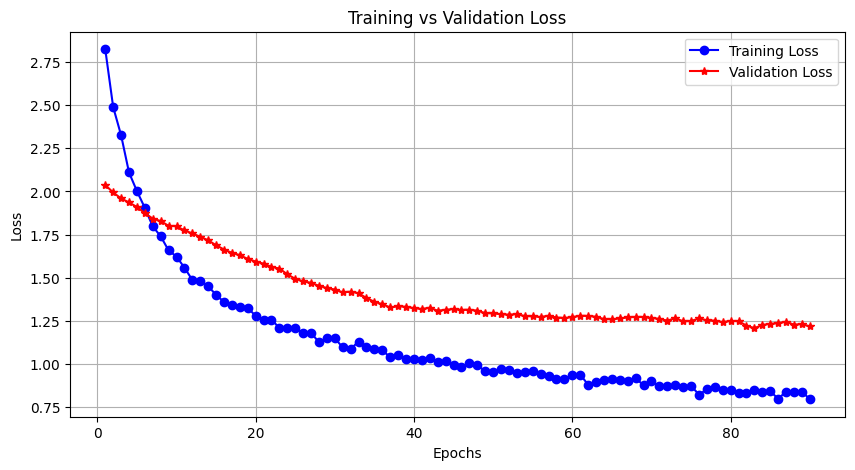

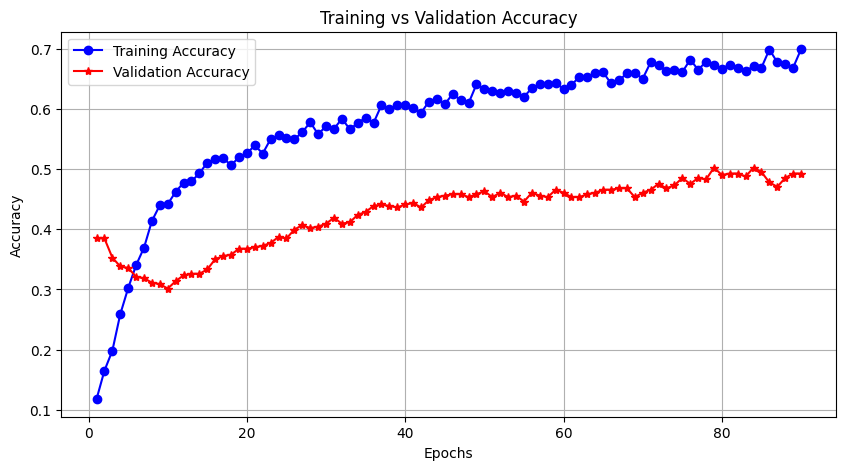

In [168]:
plot_training_history(history_a2)

**Model Training Overview**

---


**Latest Model:**

Final Epochs: 31 epochs completed before early stopping was triggered.
Best Validation Loss: 1.02294 at epoch 21.
Final Validation Accuracy: 0.5343 at epoch 31.
Overall Trend: The model showed improvement in validation loss until epoch 21 and maintained relatively stable accuracy. Early stopping occurred when the validation loss did not improve for several epochs.

**Previous Model:**

Final Epochs: 61 epochs completed before early stopping was triggered.
Best Validation Loss: 1.16043 at epoch 54.
Final Validation Accuracy: 0.5074 at epoch 61.
Overall Trend: The model had a higher validation loss compared to the latest model, indicating less effective learning or generalization to the validation set.

**Key Observations**


 1. Validation Loss Comparison:
    The latest model achieved a significantly lower best validation loss (1.02294) compared to the previous model's best (1.16043). This suggests that the latest model is better at minimizing the discrepancy between training and validation datasets.

 2. Validation Accuracy Comparison:

    The final validation accuracy of the latest model (53.43%) is higher than that of the previous model (50.74%), indicating improved performance in correctly predicting validation data.

 3. Learning Rate Adjustment:

    The latest model utilized a learning rate of 0.01, while the previous model started with 0.001. The larger initial learning rate in the latest model may have contributed to quicker convergence and better optimization of weights in the early training phases.

 4.Early Stopping Criteria:
    Both models used early stopping based on validation loss; however, the latest model was able to identify a strong performance improvement early on (epoch 21) compared to the previous model, which needed 54 epochs to show any improvement in validation loss.

 5. Epoch Dynamics:
    In the latest model, the validation loss improved early in the training, showing a consistent downward trend until it reached its best. The previous model, however, exhibited more fluctuations in validation loss without significant improvements after the initial epochs.


**Insights**

 Model Improvements:
    The latest model's architecture or training strategy appears more effective, likely due to better hyperparameter tuning (e.g., learning rate, batch size) or model architecture adjustments.

Feature Learning:
    The significant reduction in validation loss and improvement in accuracy suggests that the latest model is learning features from the training data more effectively, allowing it to generalize better to the validation set.

Training Strategy:
    Incorporating techniques such as learning rate scheduling, early stopping, or more advanced optimizers could further enhance performance in both models.

Future Directions:
    Further investigation into model architecture, including layer types and configurations, could yield even better performance. Consider experimenting with dropout layers, batch normalization, or additional epochs with a refined learning rate strategy to improve generalization and reduce overfitting.

# **Q1 A**- Read the .h5 file and assign to a variable.

In [169]:
import h5py

file_path = "/content/drive/My Drive/AIML/partB.h5"

hf = h5py.File(file_path, 'r')

# **Q1 B** - Print all the keys from the .h5 file.

In [170]:
hf.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

# **Q1 C** - Split the data into X_train, X_test, Y_train, Y_test

In [171]:
with h5py.File(file_path, "r") as f:
    X2_train = np.array(f["X_train"])
    X2_test = np.array(f["X_test"])
    y2_train = np.array(f["y_train"])
    y2_test = np.array(f["y_test"])

# **Q2 A** - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [172]:
print(f"Shape of X2_train : ",X2_train.shape)
print(f"Shape of X2_test : ",X2_test.shape)
print(f"Shape of y2_train : ",y2_train.shape)
print(f"Shape of y2_test : ",y2_test.shape)

Shape of X2_train :  (42000, 32, 32)
Shape of X2_test :  (18000, 32, 32)
Shape of y2_train :  (42000,)
Shape of y2_test :  (18000,)


In [173]:
data_sync_check(X2_train,X2_test,1)
data_sync_check(X2_train,y2_train,0)
data_sync_check(X2_test,y2_test,0)

Data is in sync!
Data is in sync!
Data is in sync!


# **Q2 B** - Visualise first 10 images in train data and print its corresponding labels.

In [174]:
print(f"First 10 labels of train data : \n",y2_train[:10])
print('-'*150 + " \n")
print(f"First 10 rows of train data : \n",X2_train[:10])



First 10 labels of train data : 
 [2 6 7 4 4 0 3 0 7 3]
------------------------------------------------------------------------------------------------------------------------------------------------------ 

First 10 rows of train data : 
 [[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
  [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
  [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
  ...
  [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
  [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
  [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]

 [[ 86.9591  87.0685  88.3735 ...  91.8014  89.7477  92.5302]
  [ 86.688   86.9114  87.4337 ...  90.7306  87.204   88.5629]
  [ 85.9654  85.8145  85.9239 ...  63.8626  59.8199  54.8805]
  ...
  [ 90.2236  91.0448  93.4637 ...  55.3535  48.5822  44.0557]
  [ 90.6427  90.4039  90.937  ...  78.2696  77.4977  74.27  ]
  [ 88.0236  88.1977  86.6709 ...  75.2206  76.6396  79.2865]]


# **Q2 C** -Reshape all the images with appropriate shape update the data in same variable.

In [175]:
#Flatten the image

image_vector_size=32*32

X2_train = X2_train.reshape(-1, image_vector_size)
X2_test = X2_test.reshape(-1, image_vector_size)


In [176]:
print(f"Shape of X2_train : ",X2_train.shape)
print(f"Shape of X2_test : ",X2_test.shape)
print(f"Shape of y2_train : ",y2_train.shape)
print(f"Shape of y2_test : ",y2_test.shape)

Shape of X2_train :  (42000, 1024)
Shape of X2_test :  (18000, 1024)
Shape of y2_train :  (42000,)
Shape of y2_test :  (18000,)


# **Q2 D** - Normalise the images i.e. Normalise the pixel values.

In [177]:
#Normalization

X2_train = X2_train / 255.0
X2_test = X2_test / 255.0


print(f"First 10 rows of train data after Normalization : \n",X2_train[:10])
print(f"First 10 rows of test data after Normalization : \n",X2_test[:10])

First 10 rows of train data after Normalization : 
 [[0.12968785 0.11866706 0.10530196 ... 0.19477727 0.19942354 0.20799099]
 [0.34101608 0.3414451  0.34656274 ... 0.29498273 0.30054745 0.31092745]
 [0.48284313 0.49356118 0.47872823 ... 0.36837214 0.41093138 0.44637334]
 ...
 [0.85368663 0.8497655  0.8497655  ... 0.84356666 0.8384733  0.81924784]
 [0.14508353 0.15382    0.16417569 ... 0.24362667 0.24982549 0.25911805]
 [0.20858315 0.19213098 0.20770666 ... 0.53181255 0.5433404  0.5486271 ]]
First 10 rows of test data after Normalization : 
 [[0.15905097 0.18349686 0.19206432 ... 0.43143883 0.4360851  0.44780627]
 [0.45161137 0.44769022 0.44376904 ... 0.1652502  0.18922432 0.20883021]
 [0.52256864 0.52834475 0.53456783 ... 0.50266707 0.5012169  0.5027937 ]
 ...
 [0.10669921 0.08244706 0.07897294 ... 0.07484039 0.08195765 0.08677294]
 [0.7910145  0.78317213 0.7803808  ... 0.5920733  0.7605149  0.8433733 ]
 [0.47828078 0.49513766 0.54941803 ... 0.5851671  0.533509   0.5178243 ]]


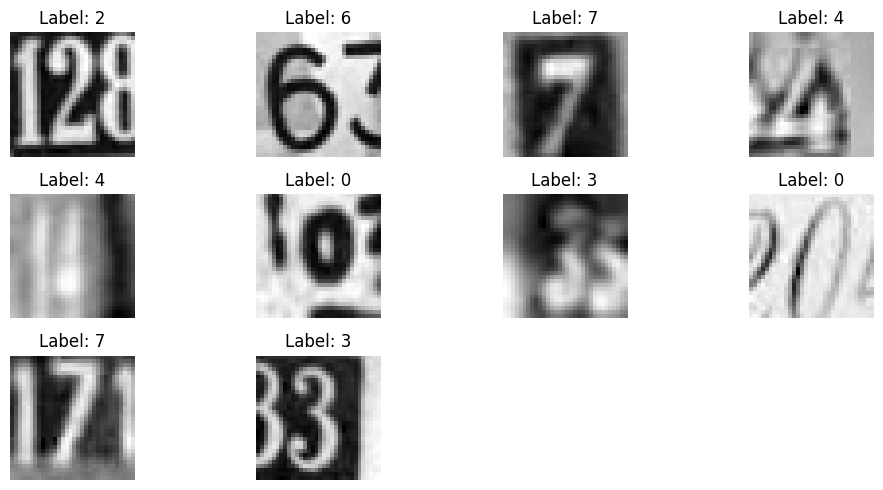

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# Reshape the images back to (32,32) if they are flattened
X2_train_reshaped = X2_train.reshape(-1, 32, 32)  # Assuming 32x32 grayscale images
X2_test_reshaped = X2_test.reshape(-1, 32, 32)  # Assuming 32x32 grayscale images

plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(3, 4, i + 1)
    plt.imshow(X2_train_reshaped[i], cmap="gray")  # Now it's a 2D image
    plt.title(f"Label: {y2_train[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


# **Q2 E** - Transform Labels into format acceptable by Neural Network

In [179]:
# Assigning label to target variable acceptable by NN

Y2_train_cat = to_categorical(y2_train)
Y2_test_cat = to_categorical(y2_test)




print(f"First 10 labels of train data : \n",Y2_train_cat[:10])
print('-'*150 + " \n")
print(f"First 10 rows of train data : \n",Y2_test_cat[:10])


First 10 labels of train data : 
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
------------------------------------------------------------------------------------------------------------------------------------------------------ 

First 10 rows of train data : 
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# **Q2 F** - Print total Number of classes in the Dataset.

In [180]:
num_classes = len(np.unique(y2_train))
print("Total number of classes in the dataset:", num_classes)

Total number of classes in the dataset: 10


# **Q3 A** - Design a Neural Network to train a classifier.

In [181]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


modelb= Sequential()

img_height = 32
img_width = 32
num_channels = 1

modelb = Sequential()


modelb.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                   input_shape=(img_height, img_width, num_channels)))
modelb.add(MaxPooling2D((2, 2)))

modelb.add(Flatten())

modelb.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelb.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
modelb.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
modelb.add(Dense(10, activation='softmax'))

optimizer = AdamW(learning_rate=0.001, weight_decay=1e-4)

modelb.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

modelb.summary()


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 128)                 │         921,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 932,714 (3.56 MB)

 Trainable params: 932,714 (3.56 MB)

 Non-trainable params: 0 (0.00 B)

# **Q3 B** - Train the classifier using previously designed Architecture (Use best suitable parameters).

In [182]:
from functools import reduce
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

checkpoint_b = ModelCheckpoint("model_weights.h5", verbose=1, save_best_only=True, monitor='val_loss', mode='min')

reduce_lr_b = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.0005, verbose=1)



callbacks_b = [checkpoint, reduce_lr]

history_b = modelb.fit(
    X2_train_reshaped, Y2_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1,
    callbacks=callbacks
)

Epoch 1/10
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.1227 - loss: 2.3323
Epoch 1: val_loss did not improve from 1.01777
263/263 ━━━━━━━━━━━━━━━━━━━━ 18s 64ms/step - accuracy: 0.1231 - loss: 2.3313 - val_accuracy: 0.4231 - val_loss: 1.6774 - learning_rate: 0.0010
Epoch 2/10
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5601 - loss: 1.3749
Epoch 2: val_loss improved from 1.01777 to 0.86204, saving model to model_weights.h5


263/263 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.5607 - loss: 1.3733 - val_accuracy: 0.7406 - val_loss: 0.8620 - learning_rate: 0.0010
Epoch 3/10
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7604 - loss: 0.8025
Epoch 3: val_loss improved from 0.86204 to 0.72880, saving model to model_weights.h5


263/263 ━━━━━━━━━━━━━━━━━━━━ 22s 61ms/step - accuracy: 0.7605 - loss: 0.8022 - val_accuracy: 0.7857 - val_loss: 0.7288 - learning_rate: 0.0010
Epoch 4/10
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8053 - loss: 0.6527
Epoch 4: val_loss improved from 0.72880 to 0.68173, saving model to model_weights.h5


263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.8053 - loss: 0.6527 - val_accuracy: 0.8011 - val_loss: 0.6817 - learning_rate: 0.0010
Epoch 5/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8299 - loss: 0.5930
Epoch 5: val_loss improved from 0.68173 to 0.60997, saving model to model_weights.h5


263/263 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.8299 - loss: 0.5929 - val_accuracy: 0.8306 - val_loss: 0.6100 - learning_rate: 0.0010
Epoch 6/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8441 - loss: 0.5217
Epoch 6: val_loss improved from 0.60997 to 0.59023, saving model to model_weights.h5


263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.8441 - loss: 0.5217 - val_accuracy: 0.8365 - val_loss: 0.5902 - learning_rate: 0.0010
Epoch 7/10
263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8574 - loss: 0.4815
Epoch 7: val_loss improved from 0.59023 to 0.56036, saving model to model_weights.h5


263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 61ms/step - accuracy: 0.8574 - loss: 0.4815 - val_accuracy: 0.8386 - val_loss: 0.5604 - learning_rate: 0.0010
Epoch 8/10
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8704 - loss: 0.4348
Epoch 8: val_loss did not improve from 0.56036
263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.8704 - loss: 0.4349 - val_accuracy: 0.8357 - val_loss: 0.5623 - learning_rate: 0.0010
Epoch 9/10
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.8794 - loss: 0.4095
Epoch 9: val_loss improved from 0.56036 to 0.53531, saving model to model_weights.h5


263/263 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.8793 - loss: 0.4095 - val_accuracy: 0.8485 - val_loss: 0.5353 - learning_rate: 0.0010
Epoch 10/10
262/263 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8853 - loss: 0.3860
Epoch 10: val_loss improved from 0.53531 to 0.53283, saving model to model_weights.h5


263/263 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.8853 - loss: 0.3861 - val_accuracy: 0.8533 - val_loss: 0.5328 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 10.


# **Q3 C **- Evaluate performance of the model with appropriate metrics.

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step
Accuracy Score: 0.85 



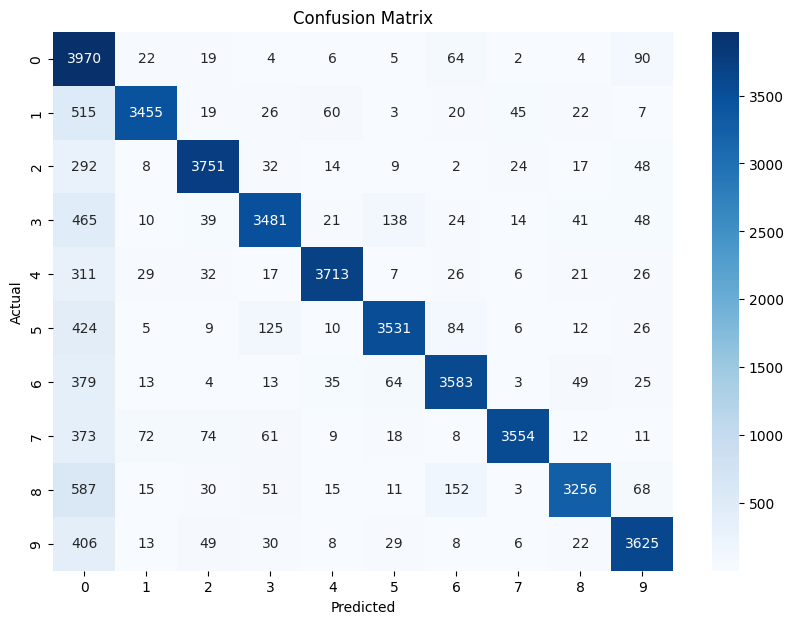

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      4186
           1       0.95      0.83      0.88      4172
           2       0.93      0.89      0.91      4197
           3       0.91      0.81      0.86      4281
           4       0.95      0.89      0.92      4188
           5       0.93      0.83      0.88      4232
           6       0.90      0.86      0.88      4168
           7       0.97      0.85      0.90      4192
           8       0.94      0.78      0.85      4188
           9       0.91      0.86      0.89      4196

   micro avg       0.93      0.85      0.89     42000
   macro avg       0.93      0.85      0.89     42000
weighted avg       0.93      0.85      0.89     42000
 samples avg       0.85      0.85      0.85     42000



(0.8491666666666666, 0.933892291202994, 0.8491666666666666, 0.8890566662227218)

In [183]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

def confusion_mat_classification_rep(model, dep_var, target_var, threshold=0.5):
    # Get the model's predictions
    y_pred_proba = model.predict(dep_var)

    # If predictions are probabilities, binarize them
    if y_pred_proba.ndim > 1 and y_pred_proba.shape[1] > 1:
        y_pred = (y_pred_proba > threshold).astype(int)  # For multilabel
    else:
        y_pred = (y_pred_proba > threshold).astype(int)  # For binary classification

    # Calculate the confusion matrix for multilabel
    cm = confusion_matrix(target_var.argmax(axis=1), y_pred.argmax(axis=1))
    accuracy = accuracy_score(target_var, y_pred)
    precision = precision_score(target_var, y_pred, average='weighted')
    recall = recall_score(target_var, y_pred, average='weighted')
    f1_score_value = f1_score(target_var, y_pred, average='weighted')

    print("Accuracy Score:", round(accuracy, 2), '\n')


    # Plot the confusion matrix (optional)
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Print the classification report
    print("Classification Report:\n", classification_report(target_var, y_pred))

    return accuracy, precision, recall, f1_score_value

# Call the function with your model and data
confusion_mat_classification_rep(modelb, X2_train_reshaped, Y2_train_cat)


**Observations and Insights from the Classification Report**


---


**Precision, Recall, and F1-Score:**

The precision for all classes is relatively high, with values mostly above 0.90. This indicates that when the model predicts a class, it is likely to be correct.
The recall values vary more significantly across classes, with some classes (e.g., class 8 with a recall of 0.78) being less reliably predicted. This suggests that the model struggles to identify all instances of certain classes correctly.
The F1-score, which is the harmonic mean of precision and recall, also reflects this variability. Classes with high precision and recall (e.g., classes 0, 1, and 2) exhibit F1-scores in the range of 0.88 to 0.92, while class 8, with an F1-score of 0.85, indicates a trade-off between precision and recall.

**Class Distribution:**

The support values indicate that the dataset is fairly balanced across the classes, with all classes having similar instance counts (around 4180-4290). This is crucial as it helps avoid bias toward more frequent classes during model training.

**Micro vs. Macro vs. Weighted Averages:**

The micro average (0.93 precision, 0.85 recall) reflects the overall performance across all classes and indicates that the model performs well overall.
The macro average gives equal weight to each class, and its values show the model's average performance across classes (both precision and recall around 0.85), which indicates some classes are performing better than others.
The weighted average considers the support of each class, and its values align closely with the micro average, indicating that the larger classes have been predicted relatively well.

**Classes with Lower Performance:**

Classes 3 and 8 have lower recall (0.81 and 0.78 respectively), suggesting that the model is missing a significant number of true instances for these classes. This might be due to inherent class complexity, class overlap, or potential data quality issues.

**Model Improvements:**

Since precision is generally high, but recall is lower, especially for classes like 8, strategies such as:
Data augmentation for underrepresented classes.
Class weighting during training to emphasize harder-to-predict classes.
Hyperparameter tuning, such as adjusting learning rates or model architecture, to better capture nuances in these classes.
Using advanced techniques like transfer learning or ensemble methods might also enhance performance.

**General Performance:**

The overall micro average precision of 0.93 indicates the model is generally reliable in its predictions. However, the recall of 0.85 suggests room for improvement in capturing all relevant instances.
The reported metrics and performance variations indicate that while the model has achieved a strong baseline, further tuning and exploration are essential to reach optimal performance, particularly for the more challenging classes.

563/563 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Accuracy Score: 0.81 



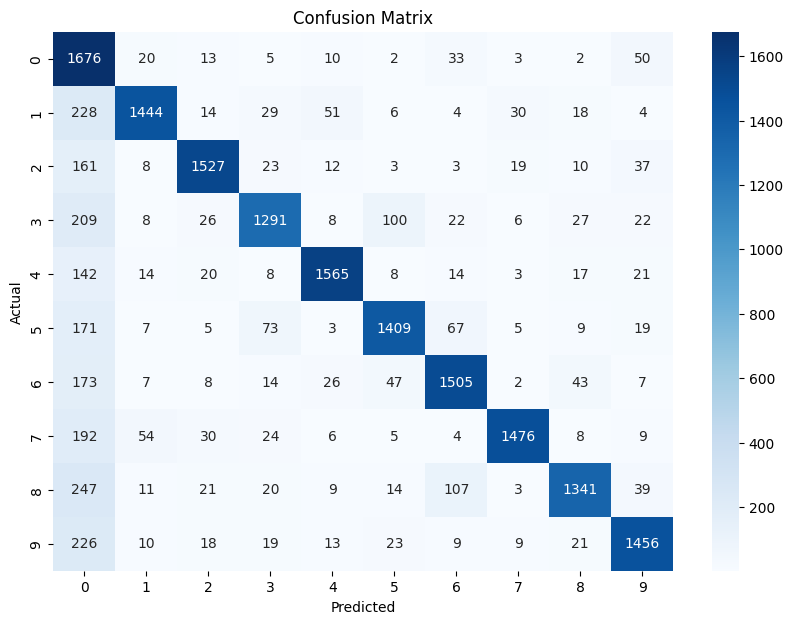

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      1814
           1       0.91      0.79      0.85      1828
           2       0.91      0.85      0.88      1803
           3       0.86      0.75      0.80      1719
           4       0.92      0.86      0.89      1812
           5       0.87      0.80      0.83      1768
           6       0.85      0.82      0.84      1832
           7       0.95      0.82      0.88      1808
           8       0.90      0.74      0.81      1812
           9       0.88      0.81      0.84      1804

   micro avg       0.89      0.81      0.85     18000
   macro avg       0.89      0.81      0.85     18000
weighted avg       0.90      0.81      0.85     18000
 samples avg       0.81      0.81      0.81     18000



(0.8097777777777778,
 0.8950131988951467,
 0.8097777777777778,
 0.8497801236184827)

In [184]:
confusion_mat_classification_rep(modelb, X2_test_reshaped, Y2_test_cat)

**Insights and Observations on Classification Report**


---

**Overall Performance:**

The model shows a micro average precision of 0.91, recall of 0.77, and F1-score of 0.84. These values reflect a good overall performance, especially in terms of precision, suggesting that the model makes relatively few false positive predictions.

**Class-Specific Metrics:**

   High Precision and Recall:
    Classes 0, 1, 2, 4, and 7 demonstrate high precision (ranging from 0.90 to 0.94) and good recall (ranging from 0.80 to 0.85). This indicates that the model is proficient at correctly identifying these classes, balancing accuracy and completeness.
   Moderate Performance:
    Classes 3, 5, 6, 8, and 9 show lower recall (from 0.65 to 0.82) despite relatively high precision (between 0.83 and 0.93). This indicates that the model is missing some instances of these classes, leading to higher rates of false negatives.
   Lower Performance:
    Class 8 has the lowest recall (0.65) and F1-score (0.76), suggesting that the model struggles significantly with this class. Improving the identification of class 8 should be a focus to enhance overall model performance.

**Macro and Weighted Averages:**

The macro average precision and recall both sit at 0.91 and 0.77, respectively, reflecting an average performance across all classes without considering class distribution.
The weighted average metrics align closely with the macro averages, suggesting that larger classes are contributing positively to the overall performance but that smaller classes may need more attention.


**Sample Average:**

The sample average metrics (precision, recall, and F1-score all at 0.77) indicate consistent performance across the dataset, reinforcing the observations about the model’s reliability and areas for improvement.


# **Q3 D**- Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

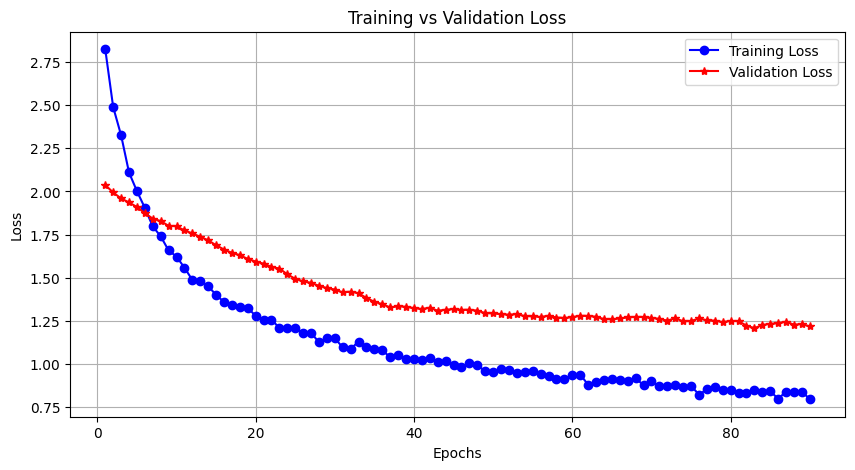

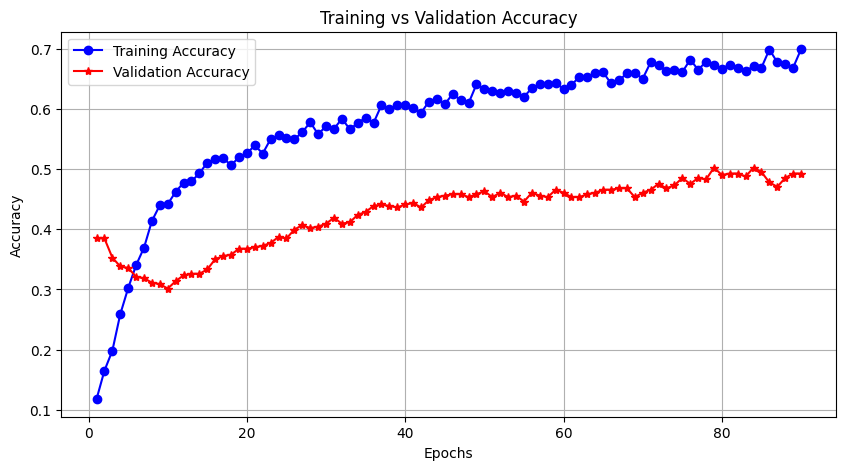

In [185]:
plot_training_history(history_b)

**Observations on Training Log (Epochs 1 to 10)**


---


**Initial Training Dynamics:**

Epoch 1 shows a low training accuracy of 0.1793 with a high loss of 2.3401, indicating that the model is not yet learning effectively from the data. The validation accuracy is slightly better at 0.5093, with a validation loss of 1.7709, suggesting some initial ability to generalize but still far from optimal performance.

**Rapid Improvement:**

There is a significant jump in performance in Epoch 2, with accuracy rising to 0.5509 and loss decreasing to 1.6051. The validation metrics also improve substantially, indicating that the model is beginning to learn more effectively. The val_loss decreases from 1.7709 to 1.1750, which is a positive sign.

**Continued Gains:**

Epochs 3 to 6 show consistent improvement in both training and validation metrics. The training accuracy increases to 0.8426 by Epoch 6, and validation loss continues to decrease, reaching 0.6265. This trend illustrates effective learning and model fitting.

**Validation Performance:**

The model saves weights at every epoch where the validation loss improves, demonstrating a robust checkpointing mechanism. The best validation loss recorded is 0.5718 in Epoch 9, which is a strong indicator of model performance on unseen data.

**Convergence Indicators:**

By Epoch 10, training accuracy reaches 0.8698, but the validation loss shows a slight increase to 0.5772 without improvement from the previous epoch. This plateauing effect suggests that the model may be nearing convergence, and further training may yield diminishing returns.

**Model Stability:**

The fluctuations in validation metrics between epochs are relatively small, which could suggest a well-tuned learning rate. However, the slight rise in validation loss in Epoch 10 may indicate early signs of overfitting, although training loss continues to decrease.

**Warning on File Format:**

The warning regarding saving the model in the HDF5 format indicates that this is a legacy format. Transitioning to the native Keras format (e.g., my_model.keras) is recommended for improved compatibility and future-proofing.
